In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
Ravdess = "C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/"
Crema = "C:/Users/SANDEEP/OneDrive/Desktop/SDP/Crema/"
Tess = "C:/Users/SANDEEP/OneDrive/Desktop/SDP/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "C:/Users/SANDEEP/OneDrive/Desktop/SDP/Savee/"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
1  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
2  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
3  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
4     calm  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Crema/10...
1  disgust  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Crema/10...
2     fear  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Crema/10...
3    happy  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Crema/10...
4  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Crema/10...

In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/TESS Tor...
1    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/TESS Tor...
2    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/TESS Tor...
3    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/TESS Tor...
4    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/TESS Tor...

In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

In [7]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Savee/DC...
1    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Savee/DC...
2    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Savee/DC...
3    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Savee/DC...
4    angry  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Savee/DC...

In [8]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
1  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
2  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
3  neutral  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...
4     calm  C:/Users/SANDEEP/OneDrive/Desktop/SDP/Ravdess/...

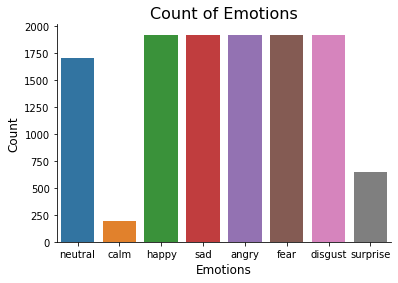

AttributeError: module 'matplotlib' has no attribute 'pyplot'

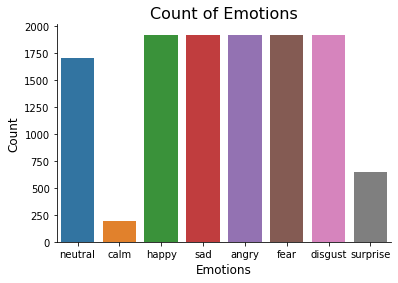

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

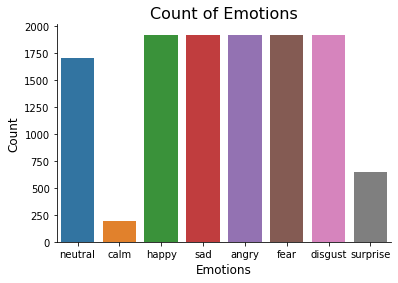

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [10]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

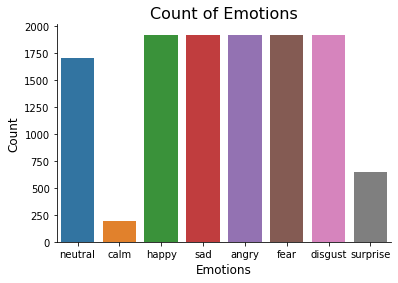

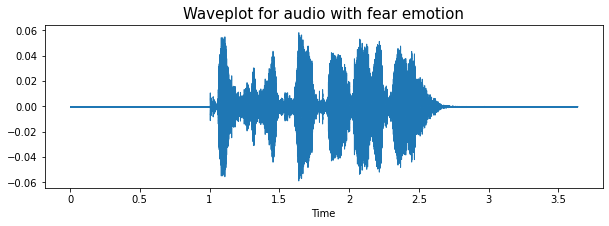

AttributeError: module 'matplotlib' has no attribute 'pyplot'

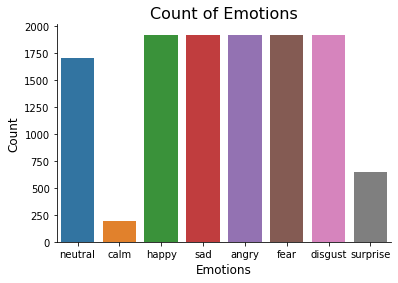

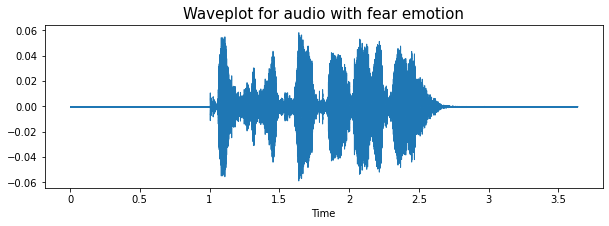

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [11]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

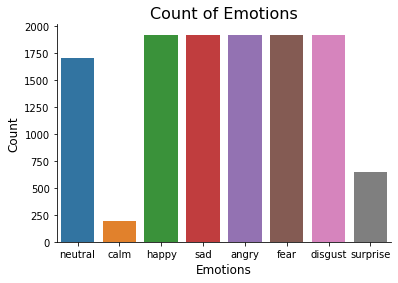

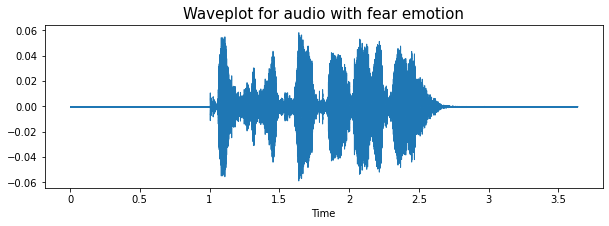

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [12]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data ):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data,sampling_rate):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=0.7)

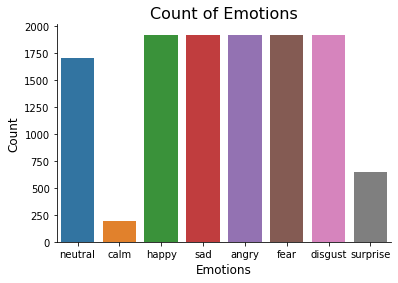

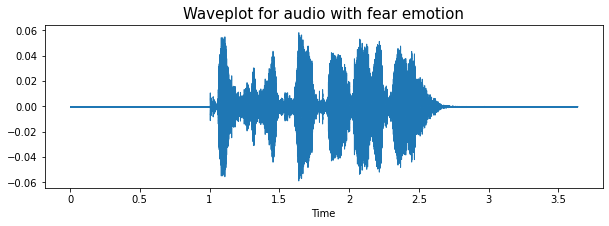

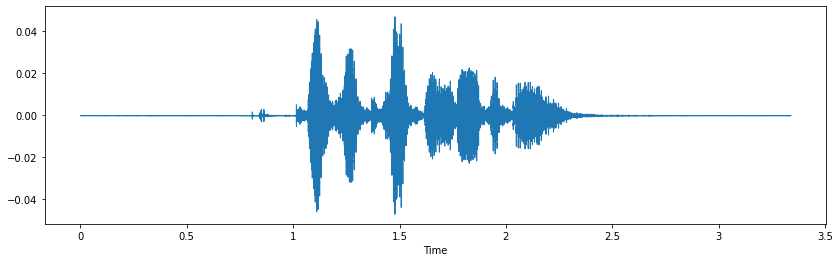

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [13]:
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)



plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

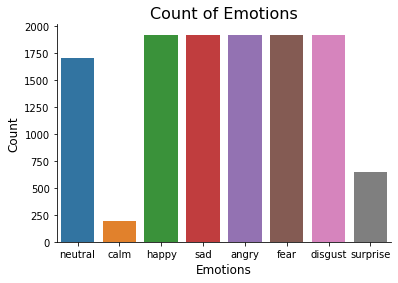

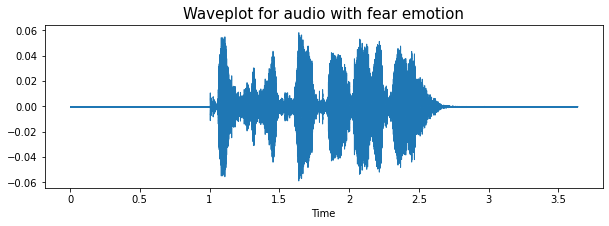

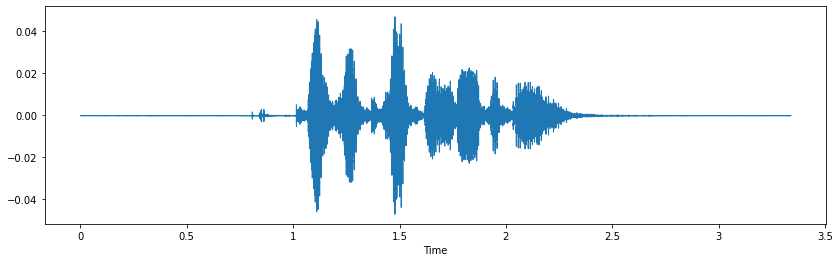

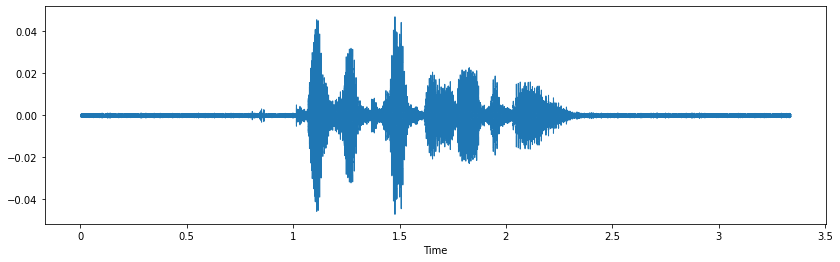

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [14]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

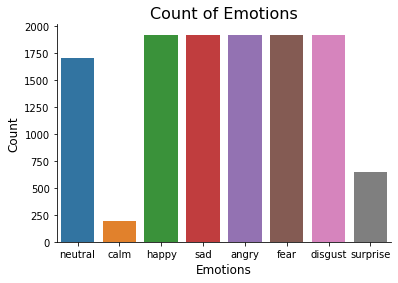

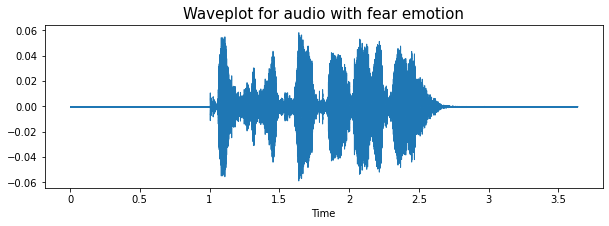

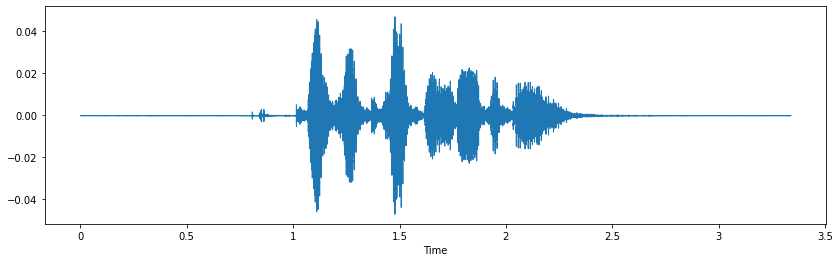

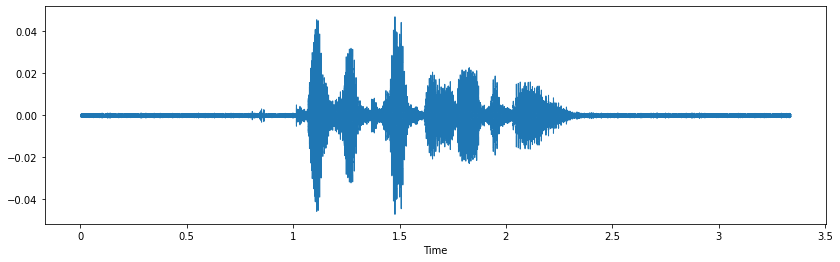

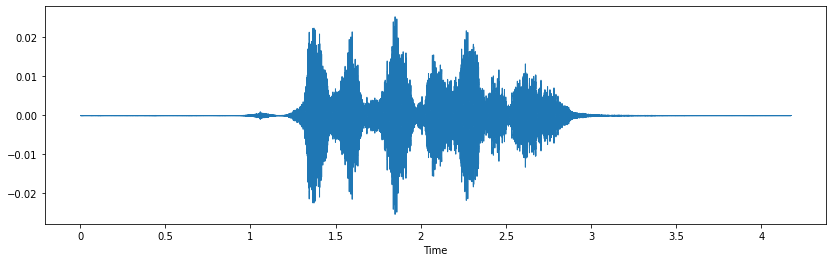

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

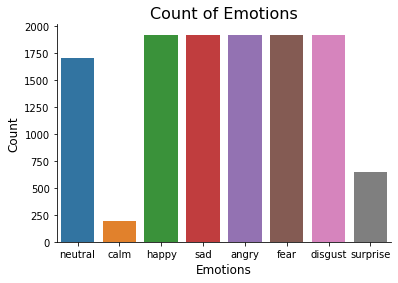

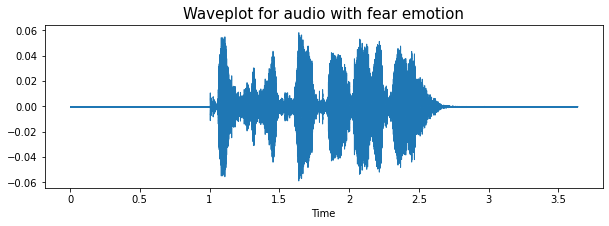

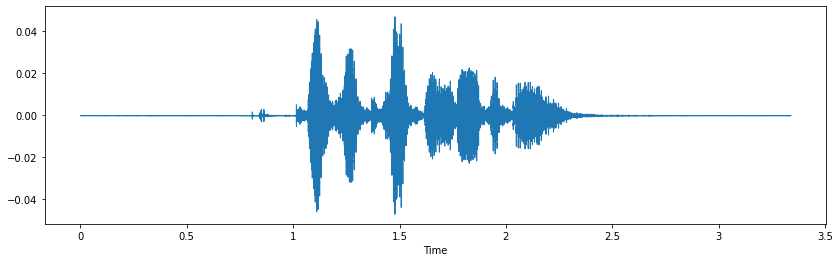

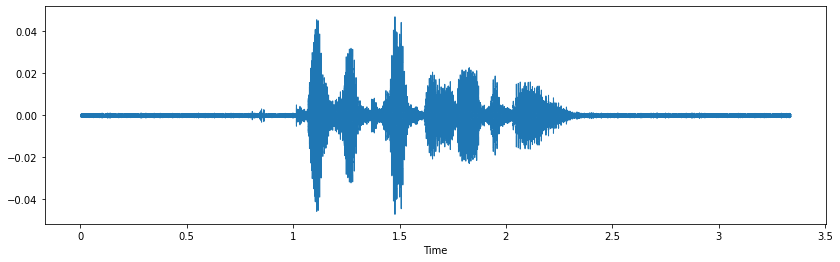

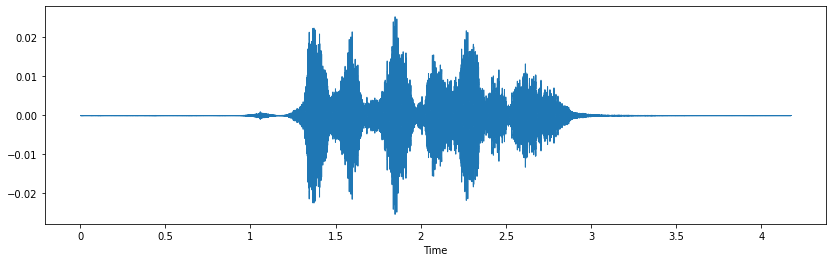

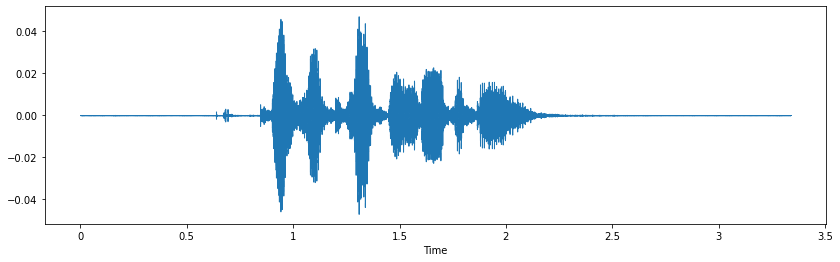

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [16]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

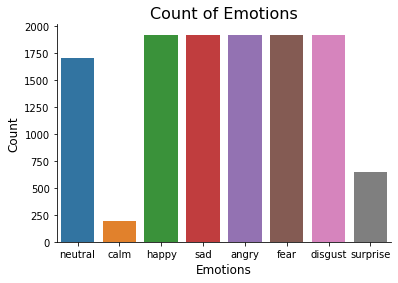

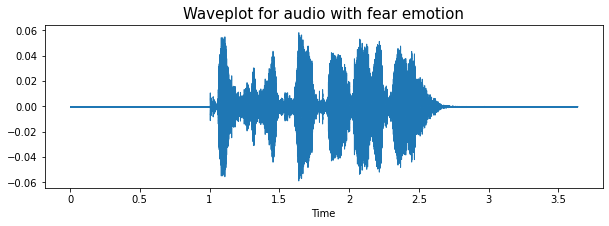

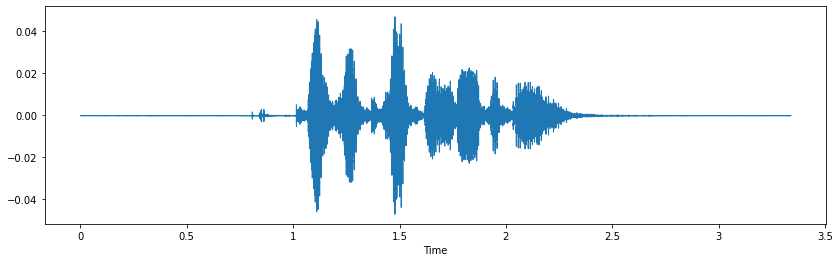

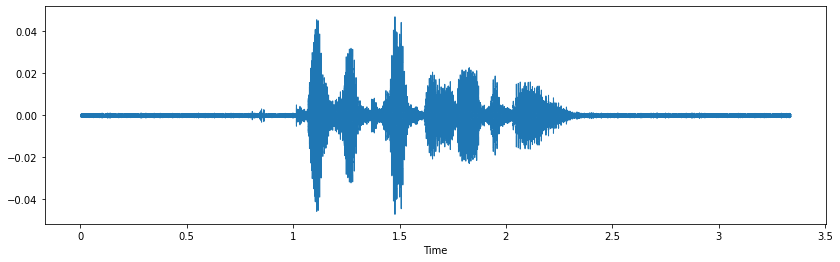

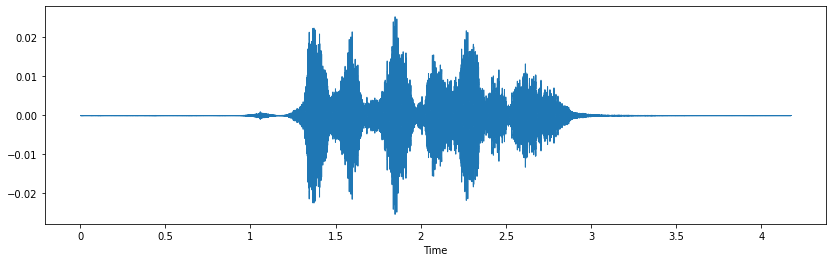

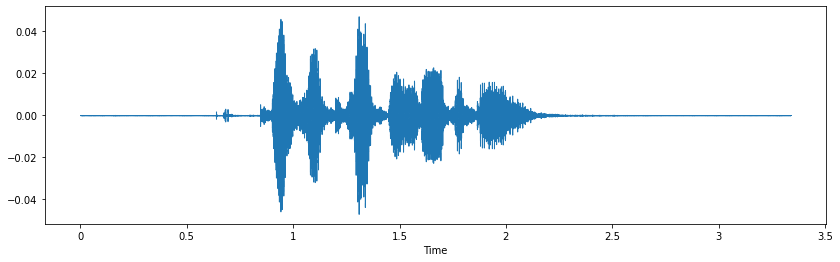

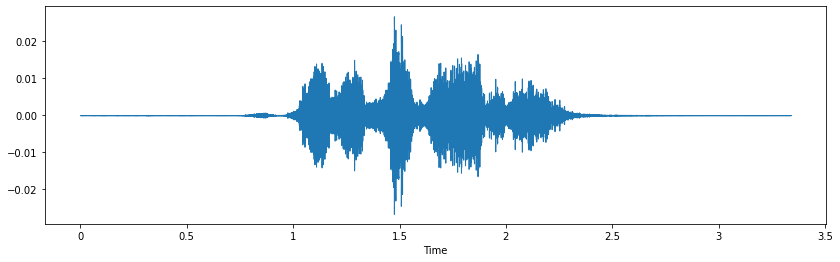

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [17]:
x = pitch(data,sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

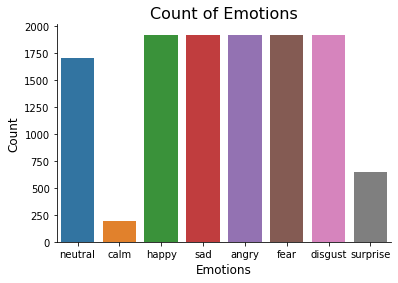

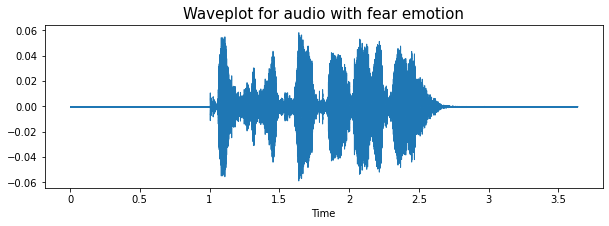

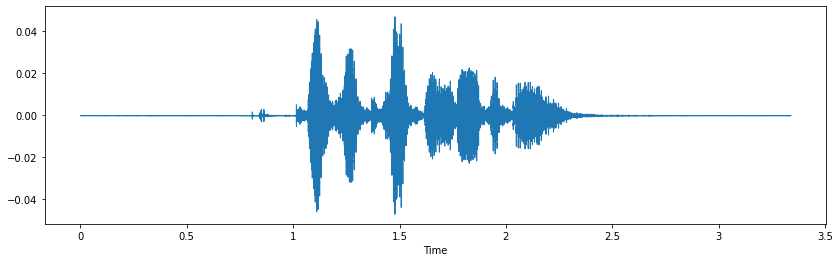

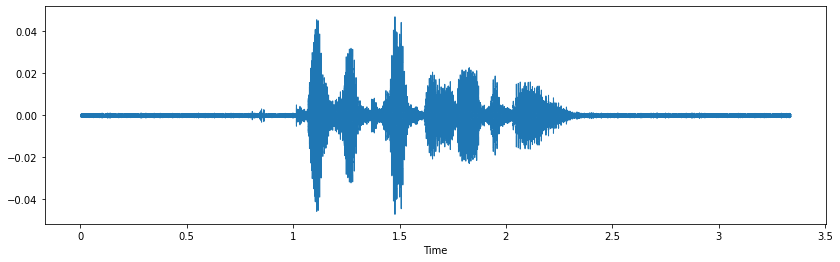

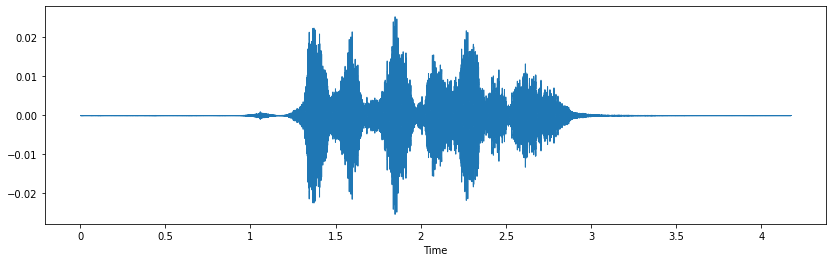

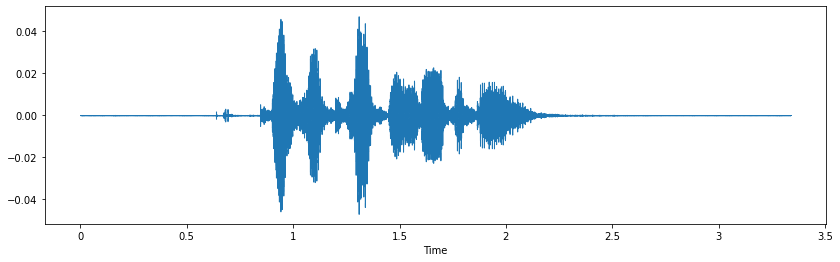

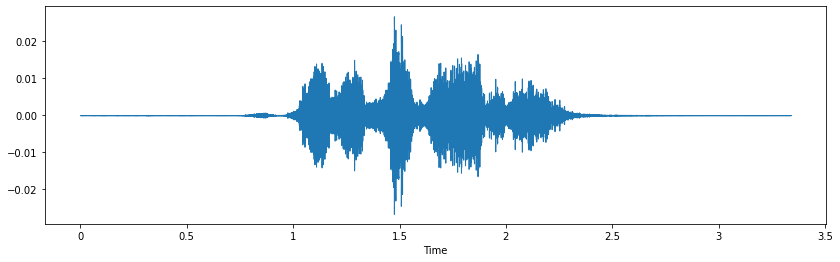

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [18]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

KeyboardInterrupt: 

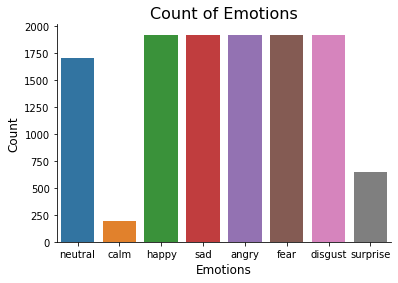

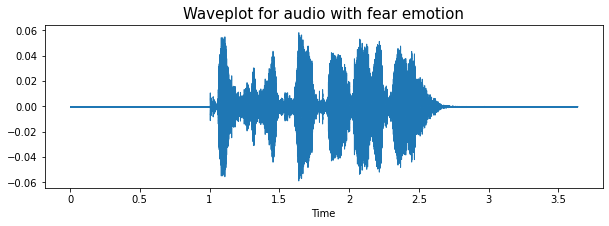

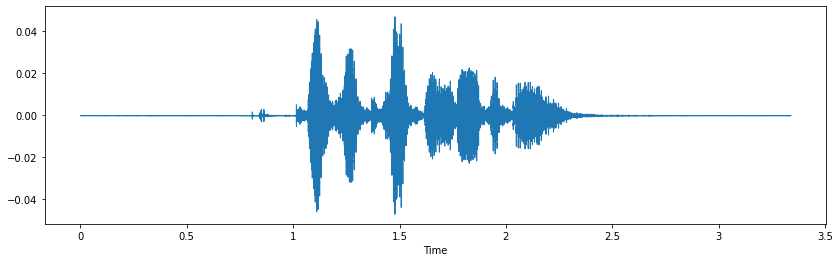

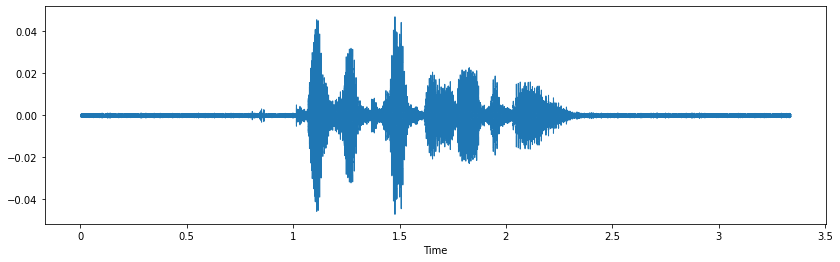

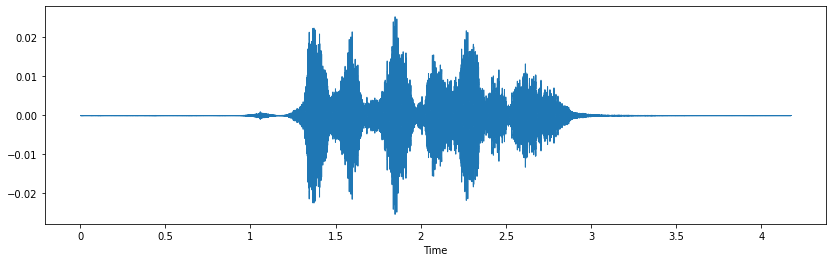

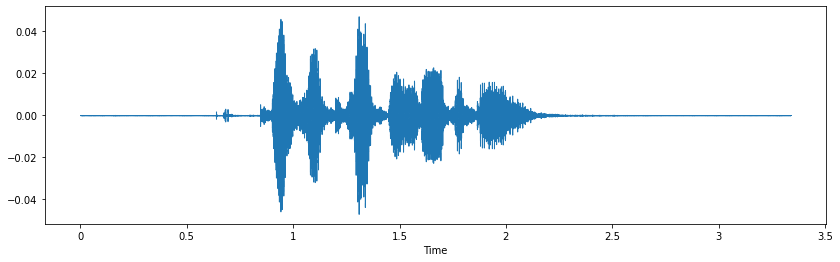

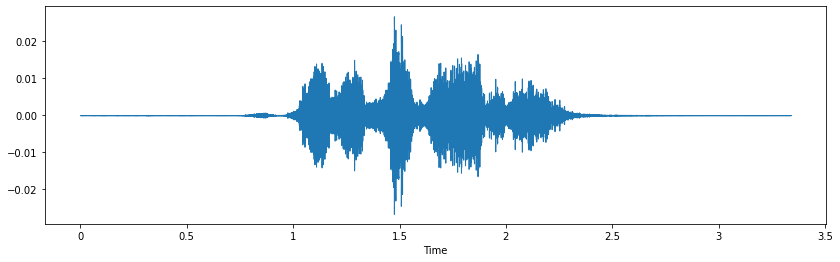

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [19]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

(1041, 1041, (12162,))

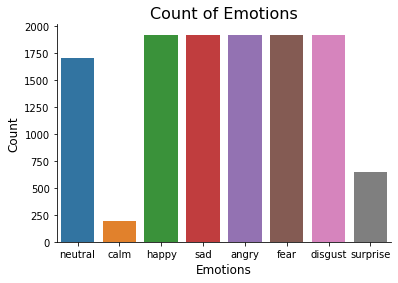

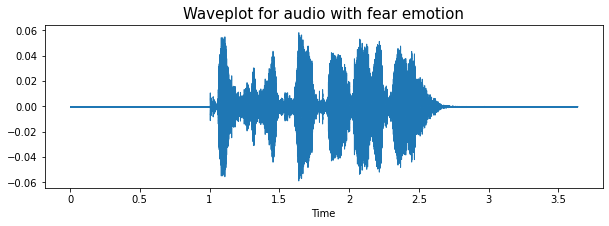

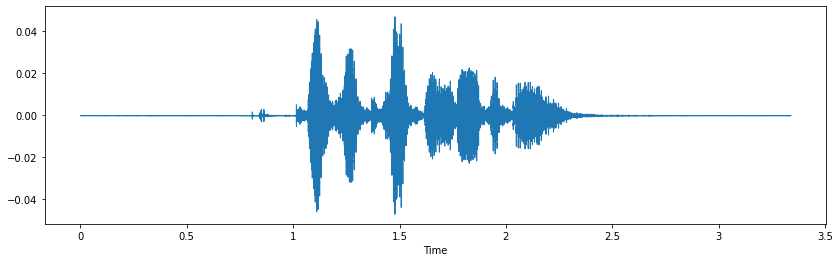

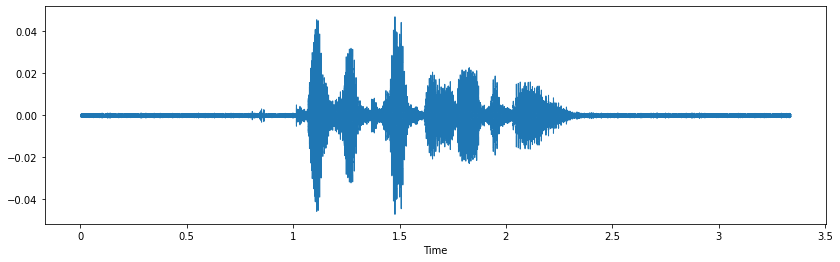

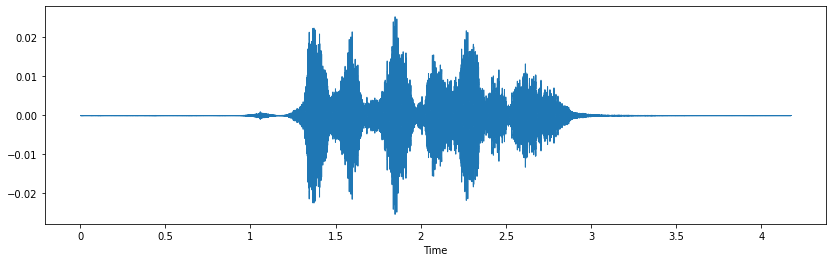

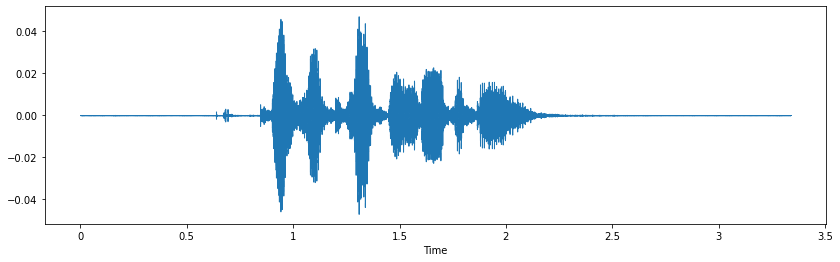

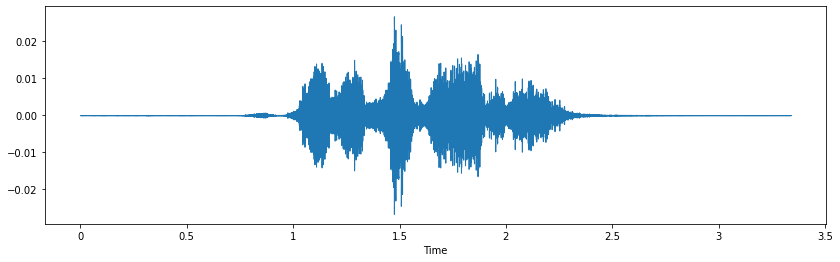

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [20]:
len(X), len(Y), data_path.Path.shape

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.335259  0.811374  0.836825  0.823959  0.827509  0.830846  0.723960   
2  0.188285  0.622130  0.699225  0.753333  0.721221  0.701736  0.682347   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.330937  0.786890  0.836962  0.824364  0.801489  0.801165  0.736197   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.671341  0.717398  0.757053  ...  1.374845e-04  1.415653e-04   
2  0.662826  0.686492  0.733961  ...  8.577343e-07  9.576414e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.654035  0.708344  0.743572  ...  1.367160e-04  1.432591e-04   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116493e-06  8.190282e-06  0.000007  0.000005   
1  1.406370e-04  1.381274e-04  1.381365e-04  1.486458e-04  0.000140  0.000147   
2  7.733593e-07  5.233101e-07  3.592793e-07  9.261689e-07  0.000002  0.000001   
3  6.654923e-06  6.979548e-06  1.214236e-05  9.640183e-06  0.000011  0.000006   
4  1.476851e-04  1.455995e-04  1.515842e-04  1.534643e-04  0.000152  0.000137   

            161   labels  
0  4.245834e-07  neutral  
1  1.337675e-04  neutral  
2  7.753987e-08  neutral  
3  4.254087e-07  neutral  
4  1.340269e-04  neutral  

[5 rows x 163 columns]

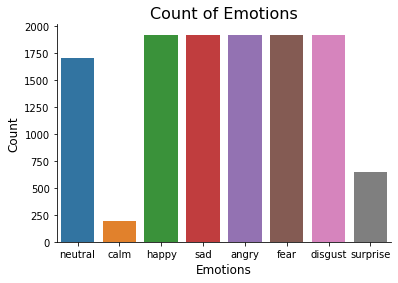

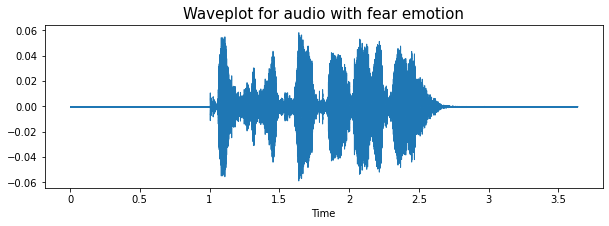

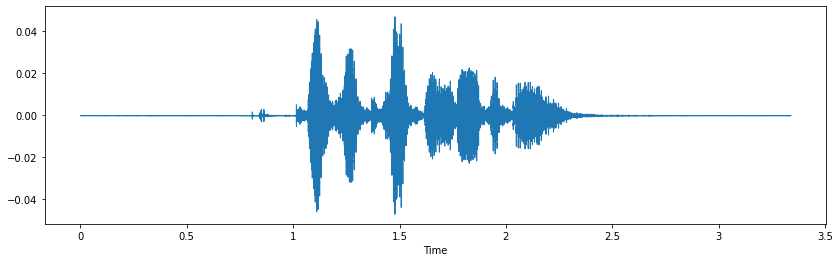

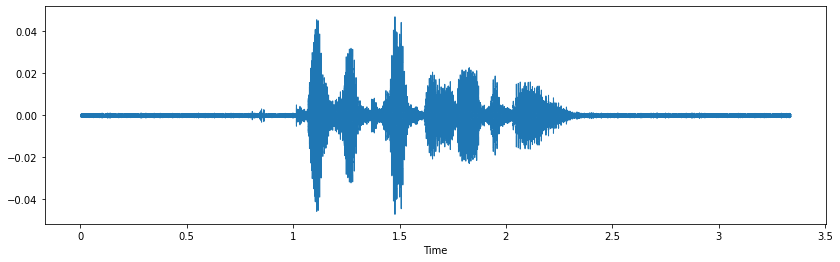

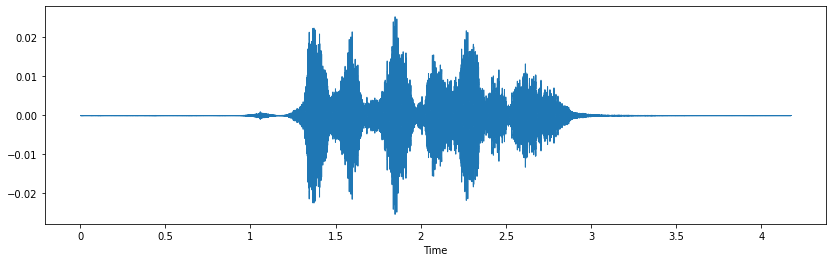

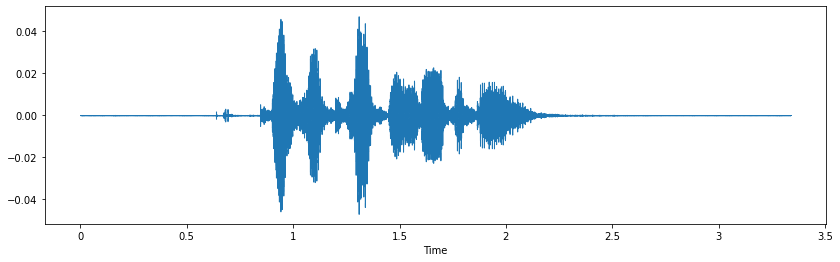

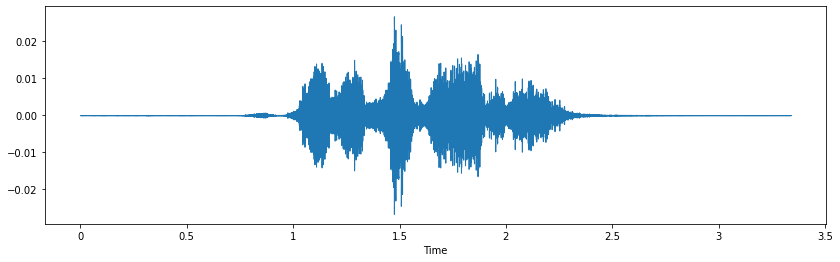

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [21]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

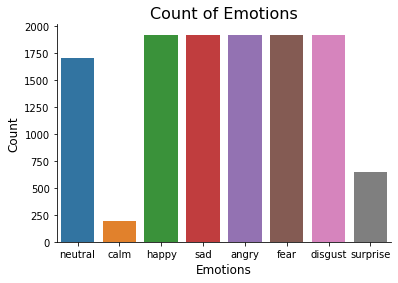

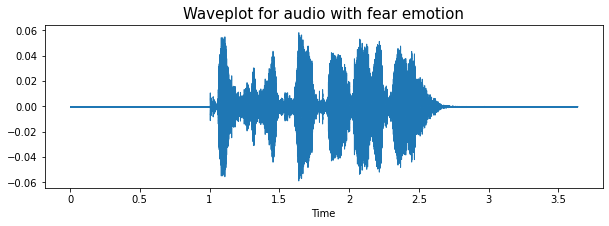

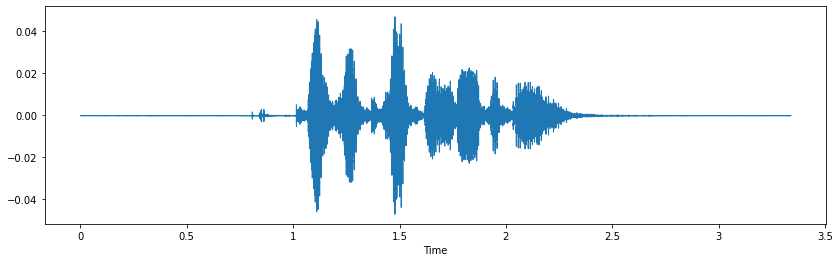

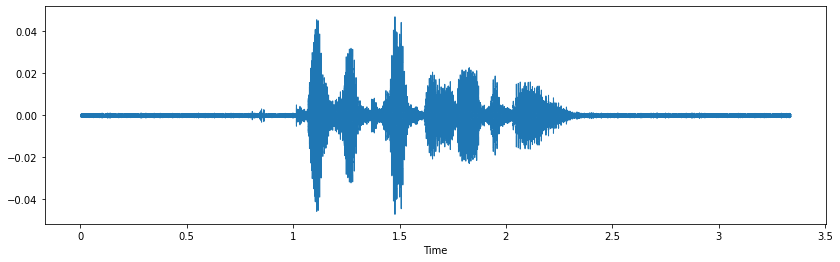

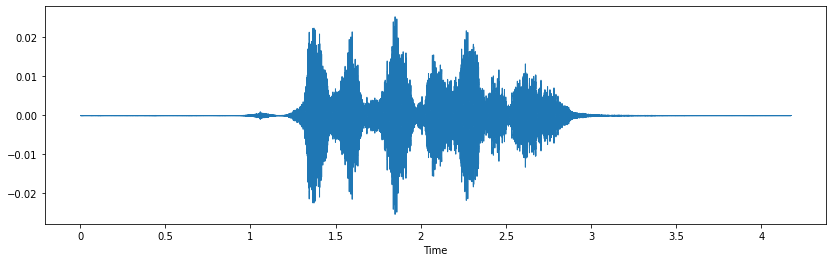

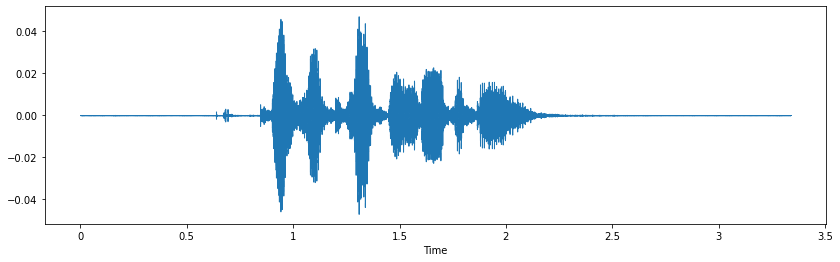

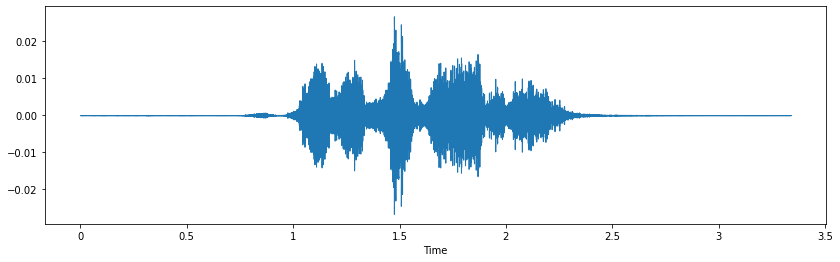

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [22]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

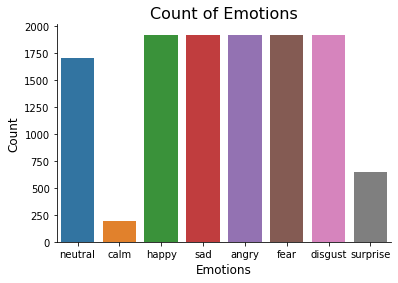

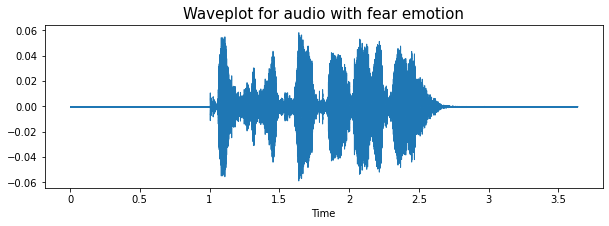

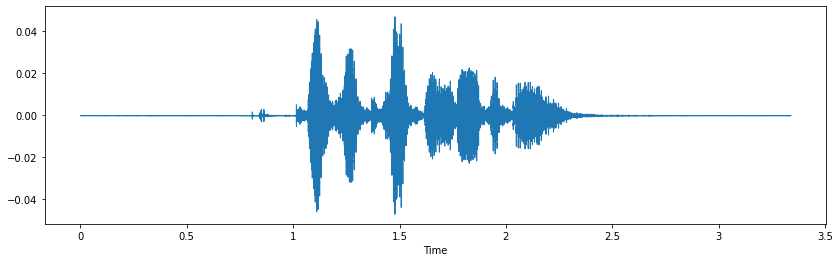

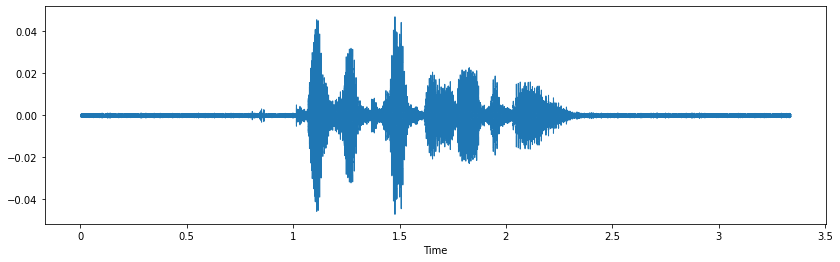

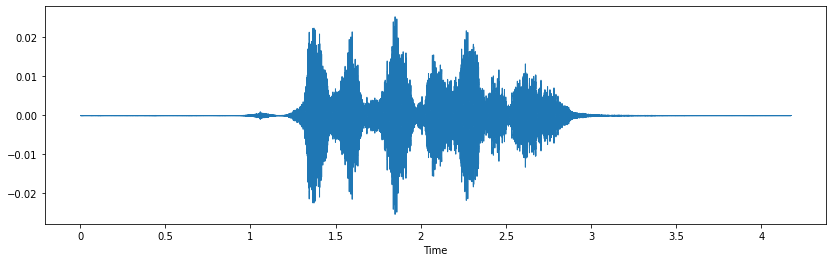

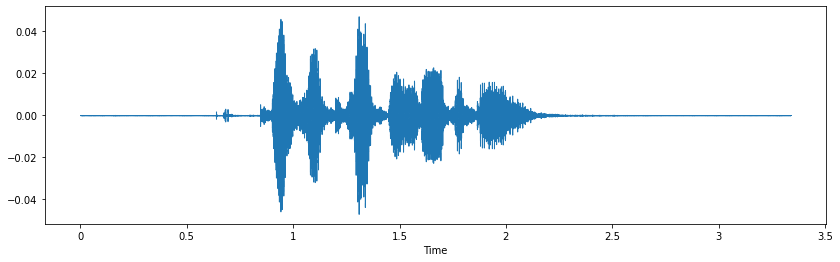

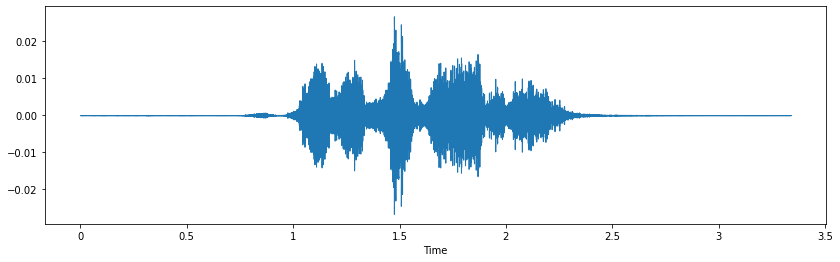

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [23]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

((780, 162), (780, 8), (261, 162), (261, 8))

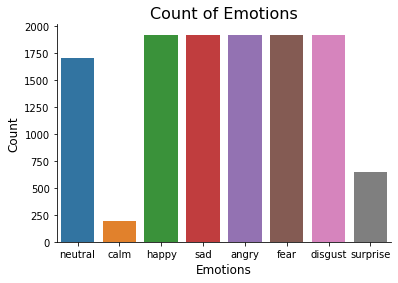

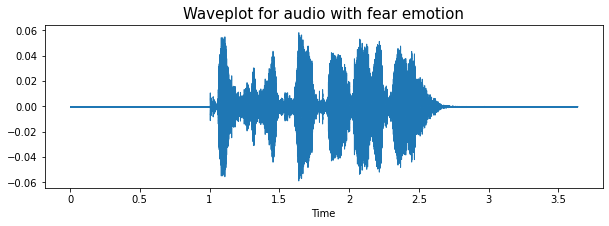

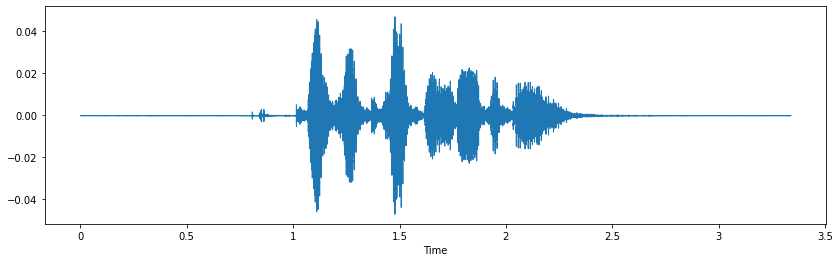

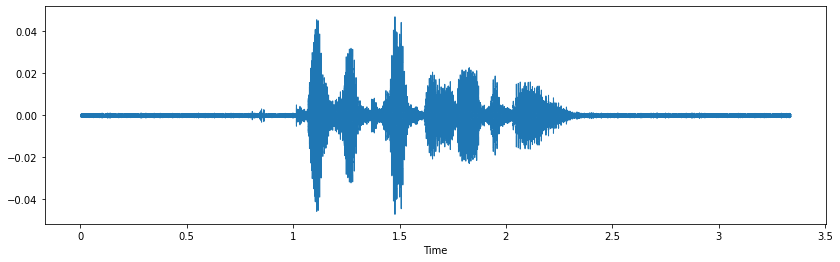

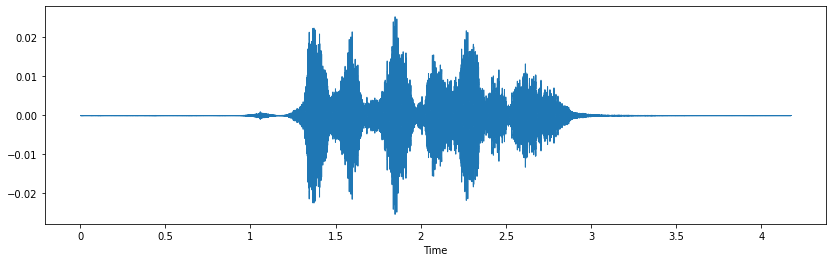

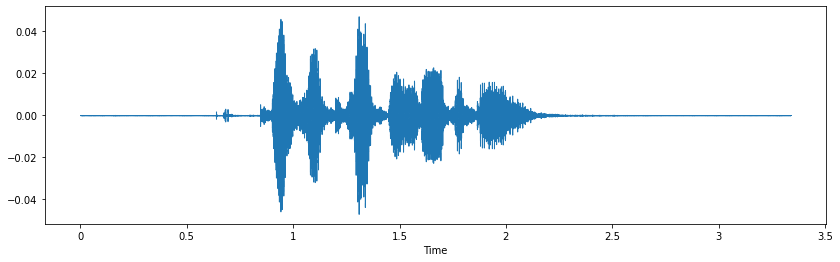

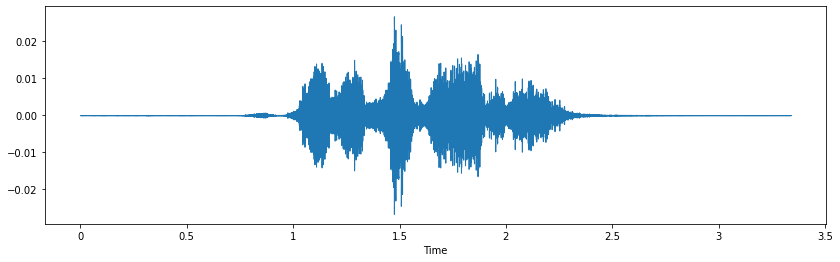

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((780, 162), (780, 8), (261, 162), (261, 8))

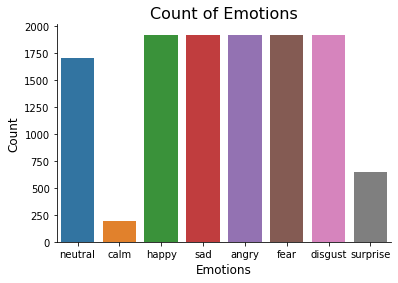

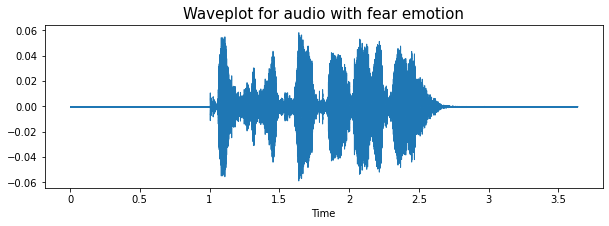

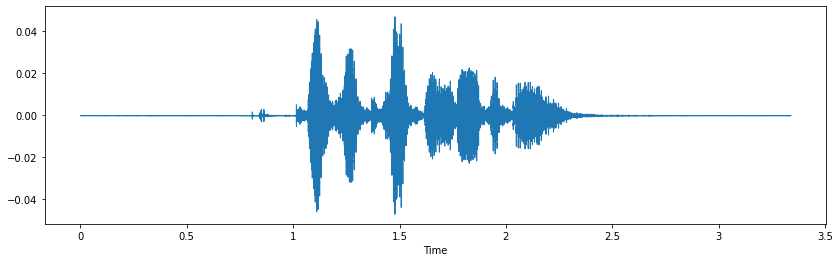

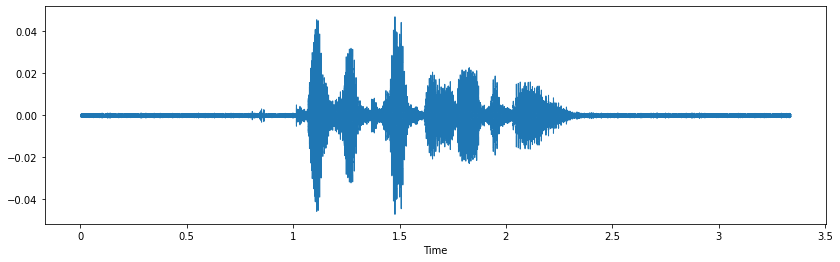

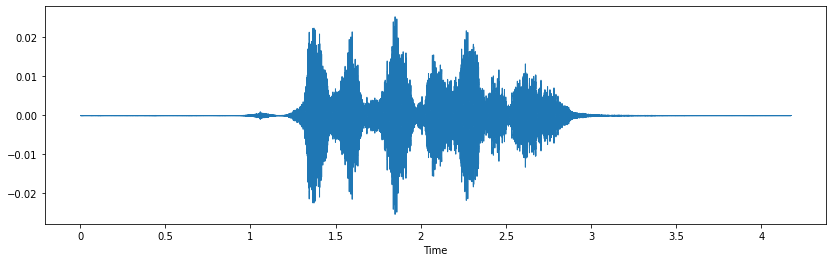

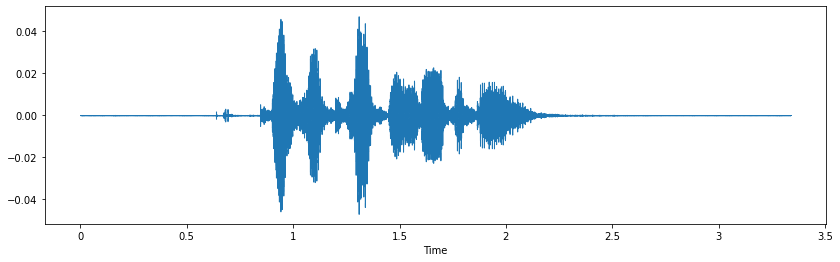

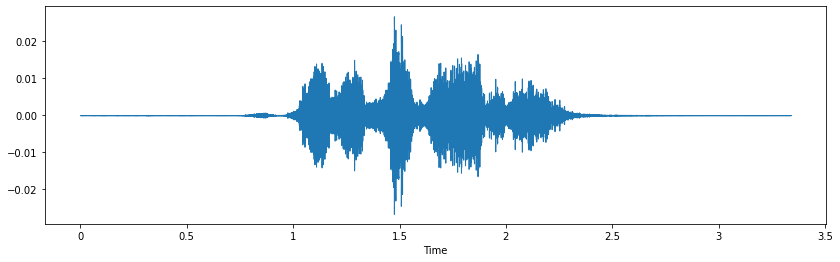

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [25]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((780, 162, 1), (780, 8), (261, 162, 1), (261, 8))

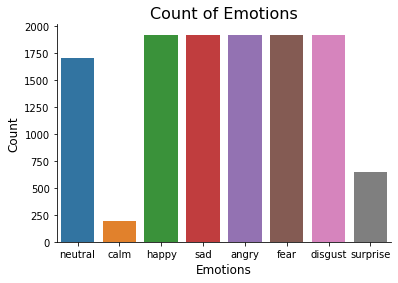

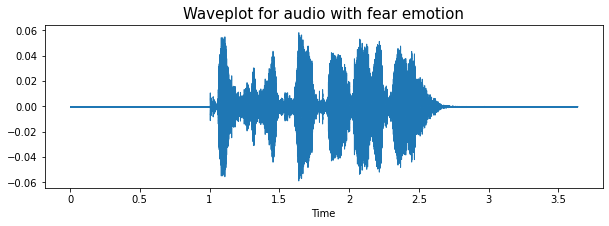

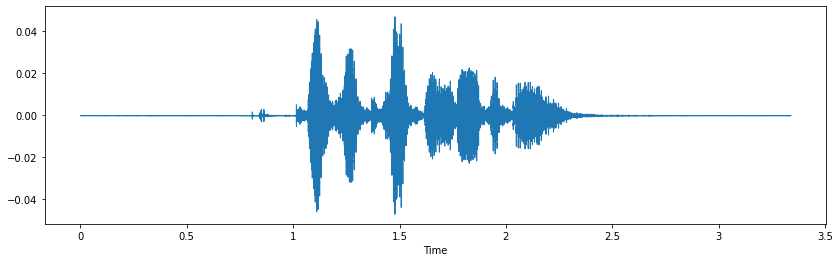

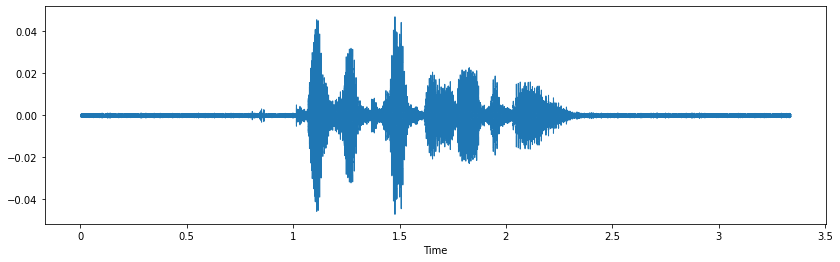

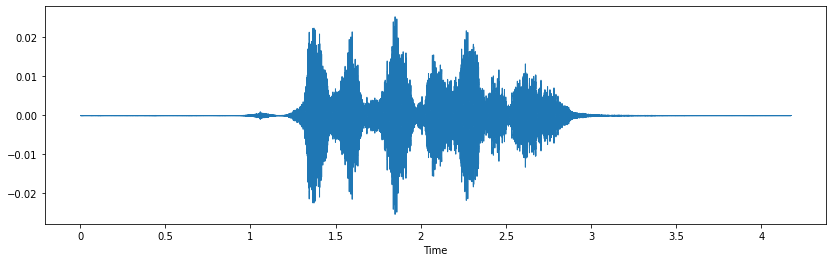

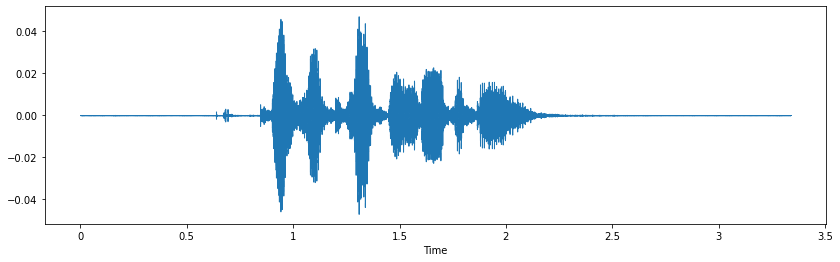

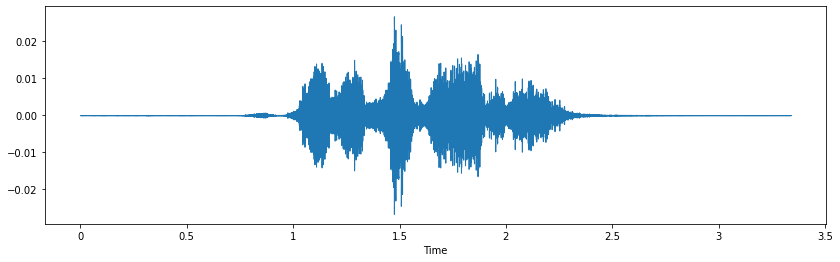

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [26]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

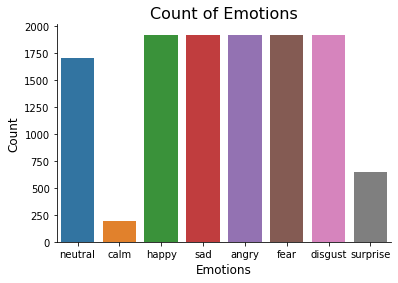

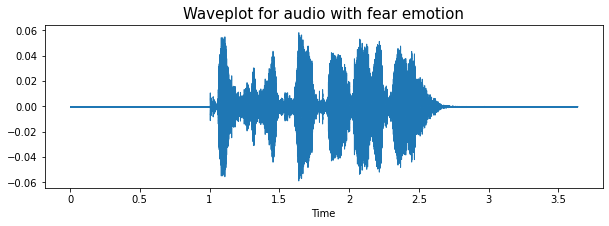

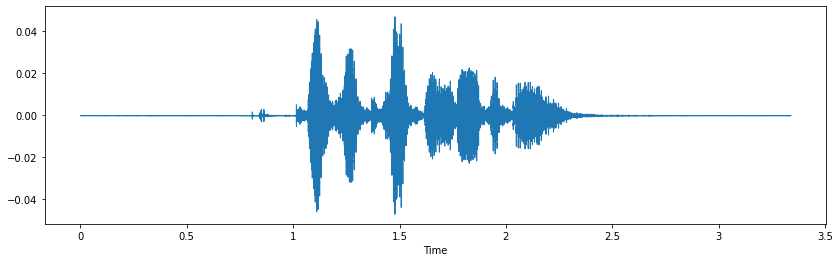

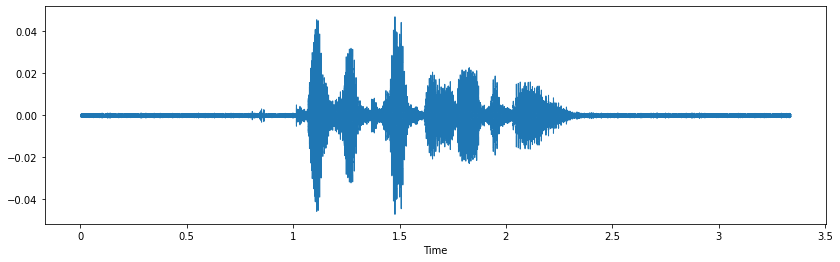

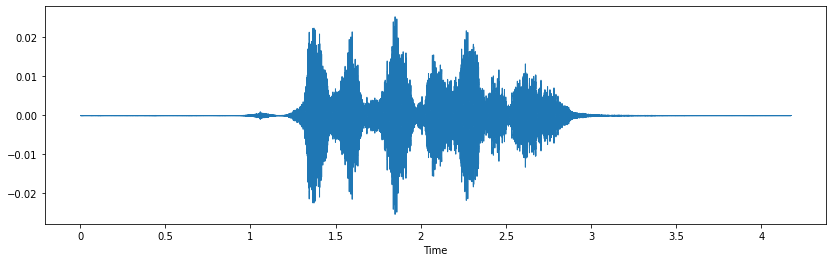

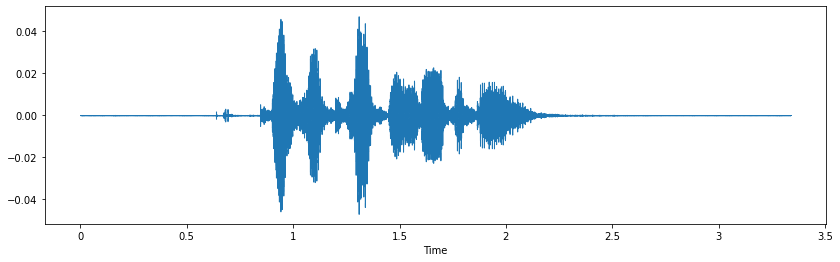

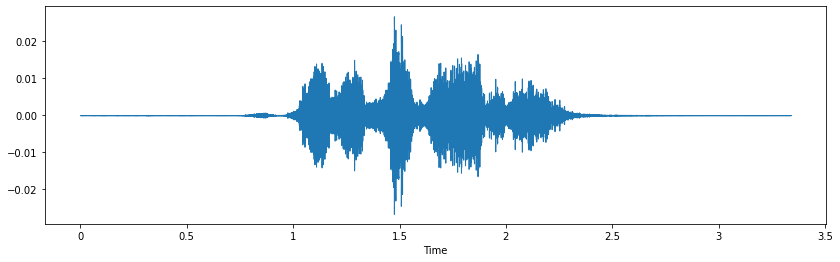

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [27]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Epoch 1/50
13/13 [==============================] - 3s 155ms/step - loss: 2.0118 - accuracy: 0.1872 - val_loss: 1.9339 - val_accuracy: 0.2069 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 2s 137ms/step - loss: 1.9553 - accuracy: 0.2038 - val_loss: 1.9077 - val_accuracy: 0.2414 - lr: 0.0010
Epoch 3/50
13/13 [==============================] - 2s 137ms/step - loss: 1.9040 - accuracy: 0.2359 - val_loss: 1.8603 - val_accuracy: 0.2490 - lr: 0.0010
Epoch 4/50
13/13 [==============================] - 2s 147ms/step - loss: 1.8654 - accuracy: 0.2628 - val_loss: 1.8573 - val_accuracy: 0.2605 - lr: 0.0010
Epoch 5/50
13/13 [==============================] - 2s 145ms/step - loss: 1.8558 - accuracy: 0.2564 - val_loss: 1.8254 - val_accuracy: 0.2529 - lr: 0.0010
Epoch 6/50
13/13 [==============================] - 2s 173ms/step - loss: 1.8159 - accuracy: 0.2833 - val_loss: 1.8160 - val_accuracy: 0.2835 - lr: 0.0010
Epoch 7/50
13/13 [==============================] - 2s 148ms/step - lo

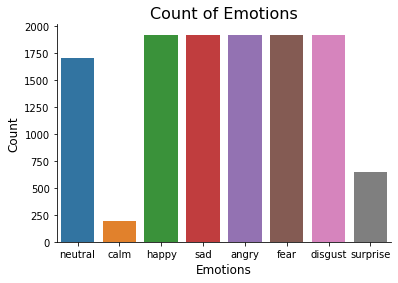

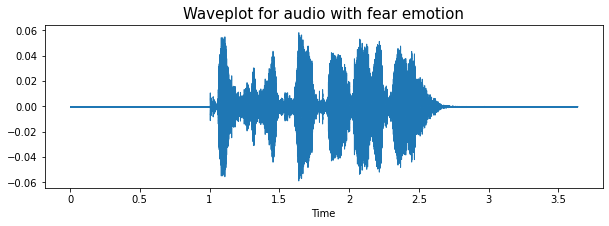

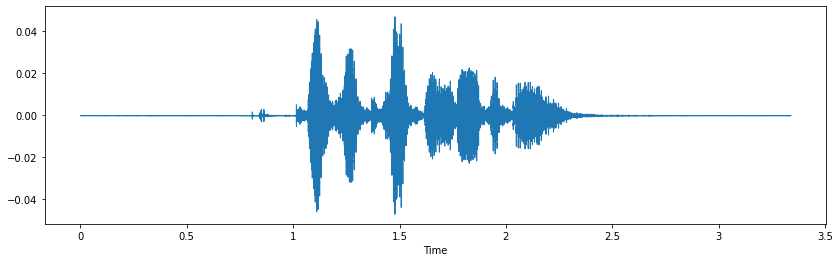

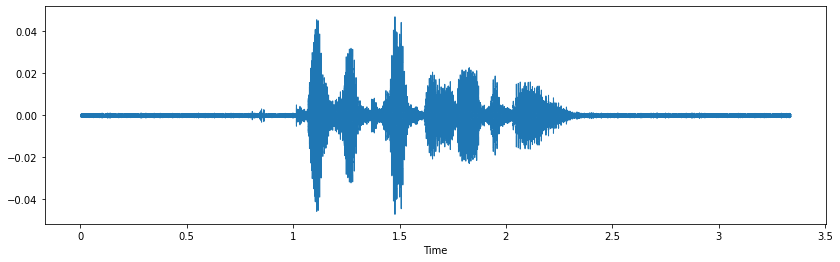

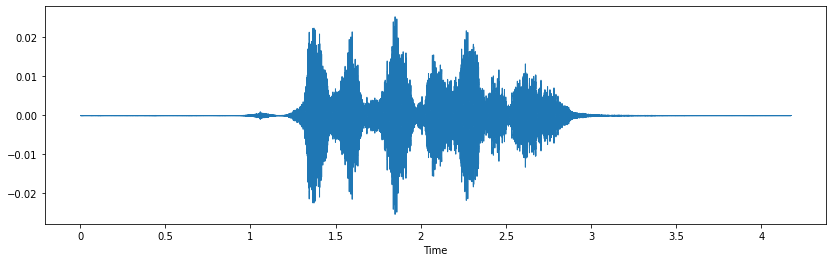

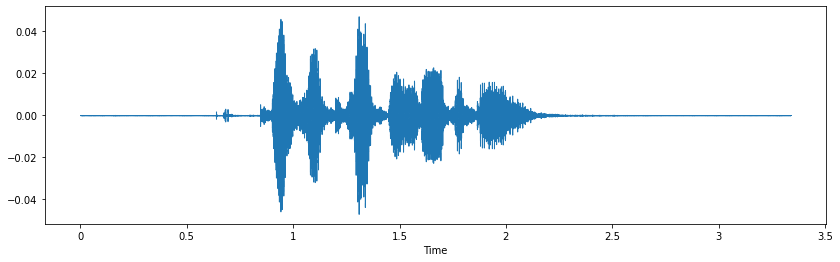

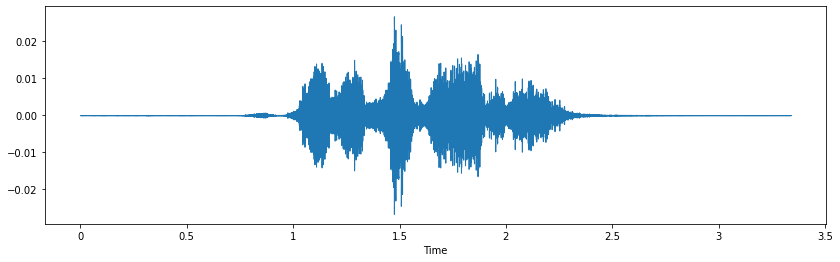

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [28]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

9/9 [==============================] - 0s 16ms/step - loss: 1.0576 - accuracy: 0.6897
Accuracy of our model on test data :  68.96551847457886 %


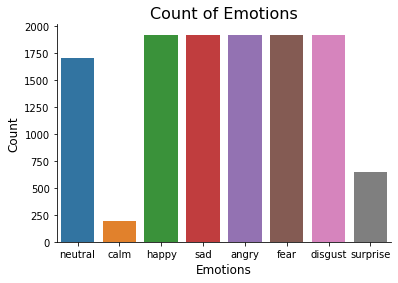

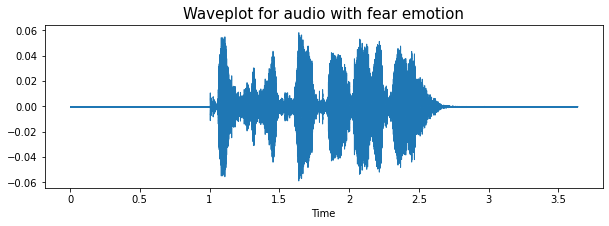

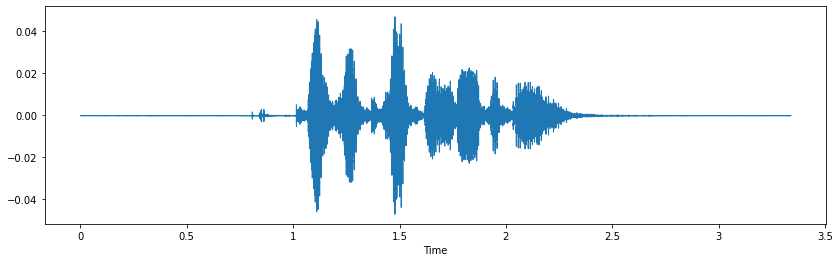

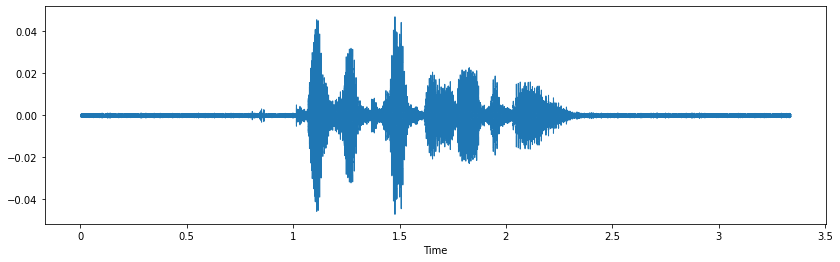

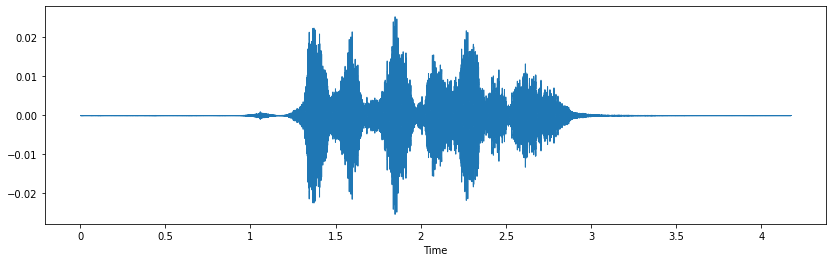

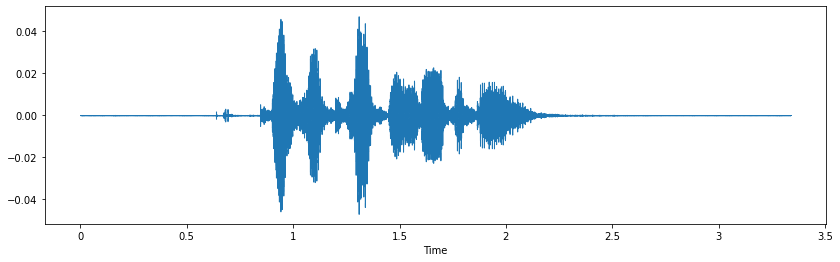

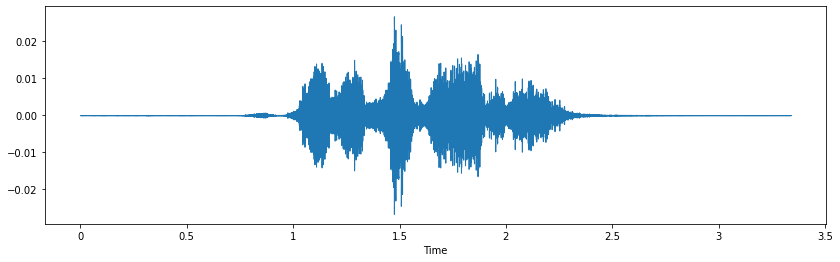

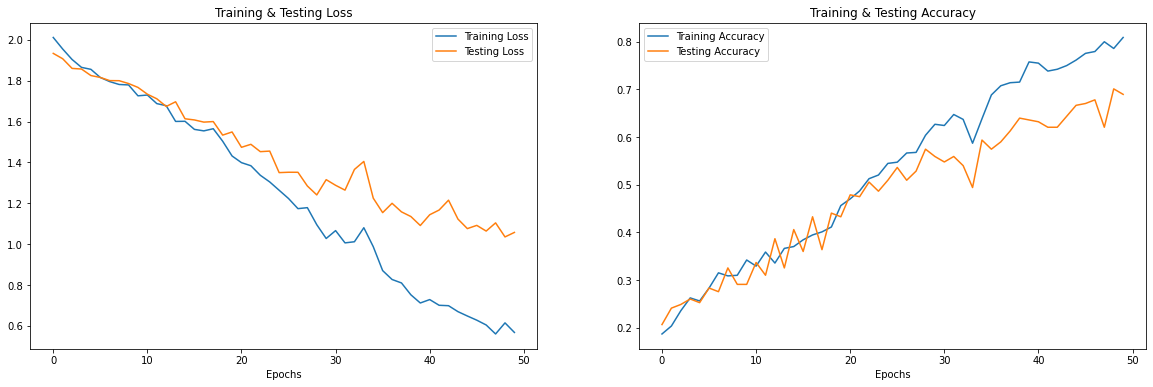

AttributeError: module 'matplotlib' has no attribute 'pyplot'

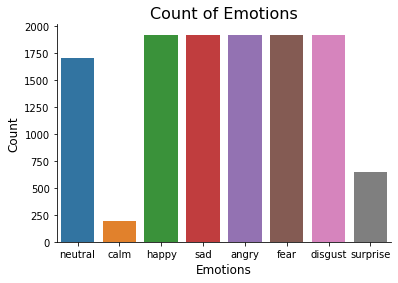

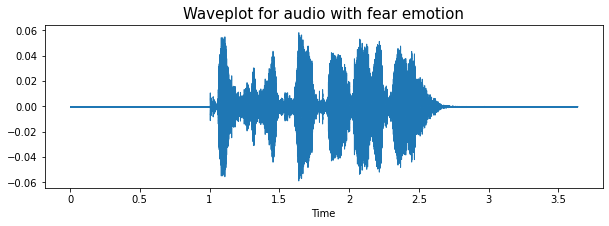

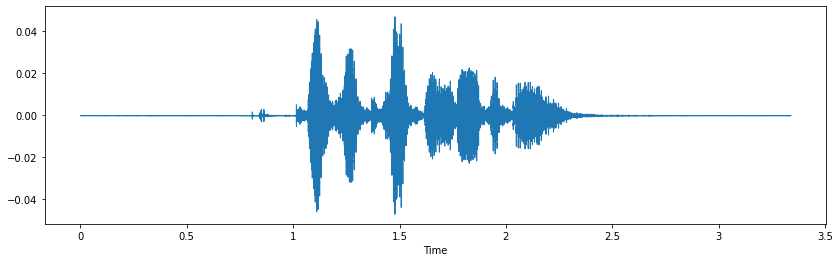

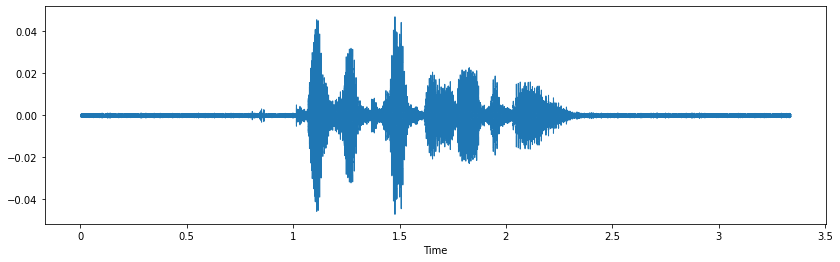

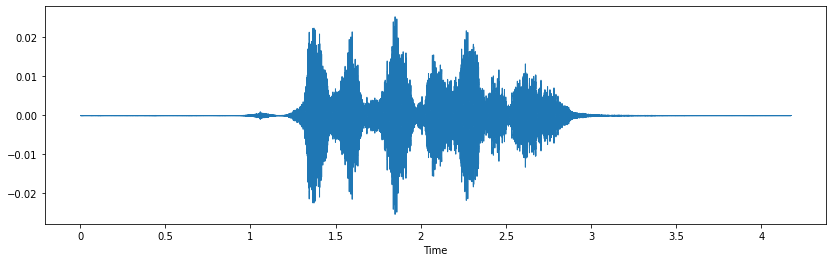

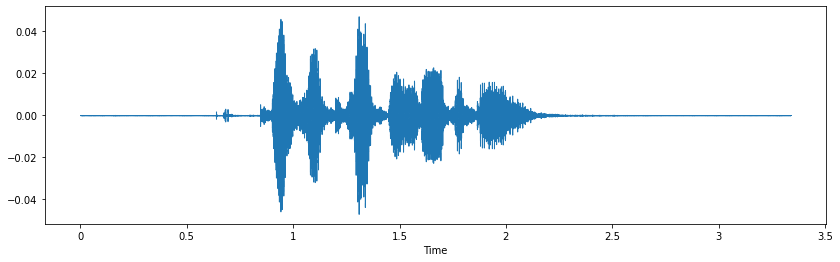

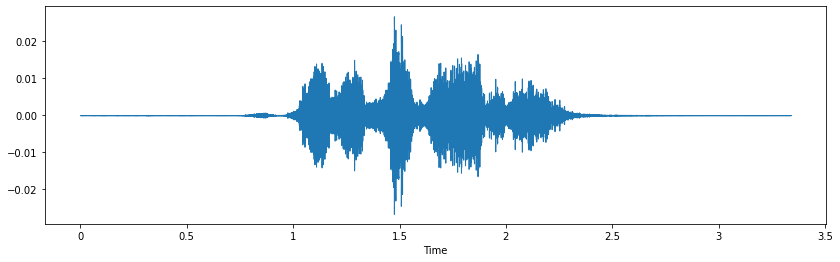

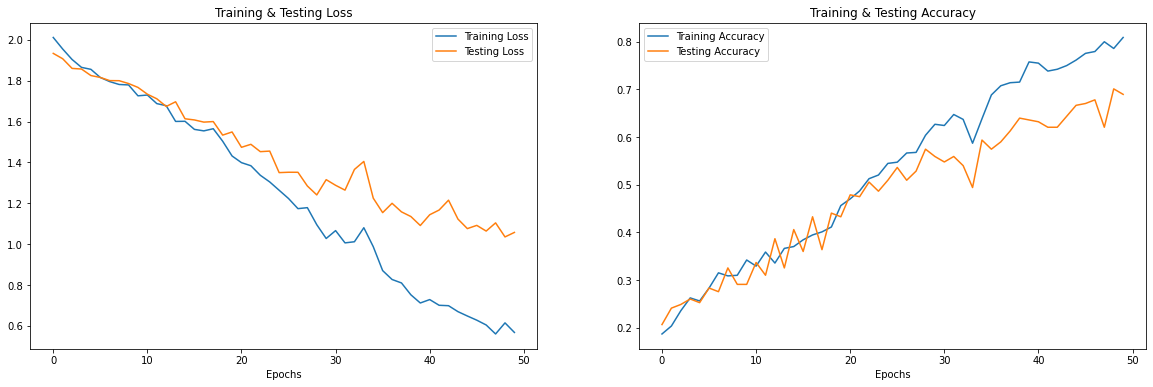

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [29]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

9/9 [==============================] - 0s 15ms/step


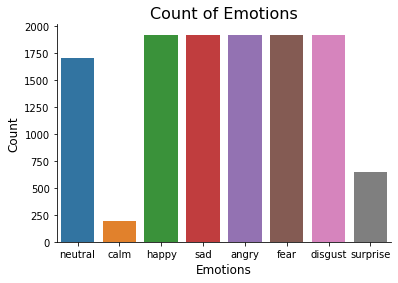

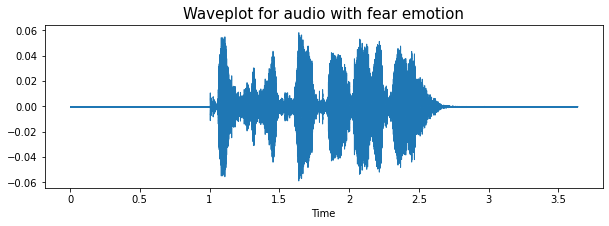

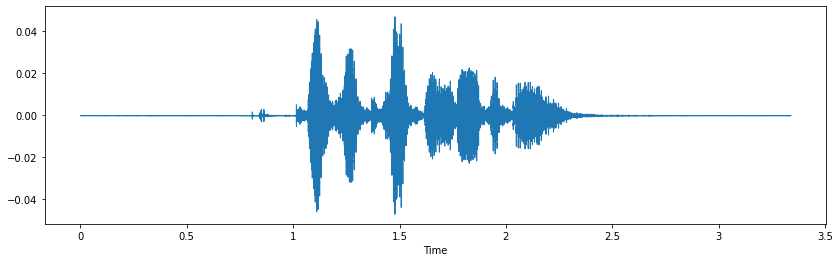

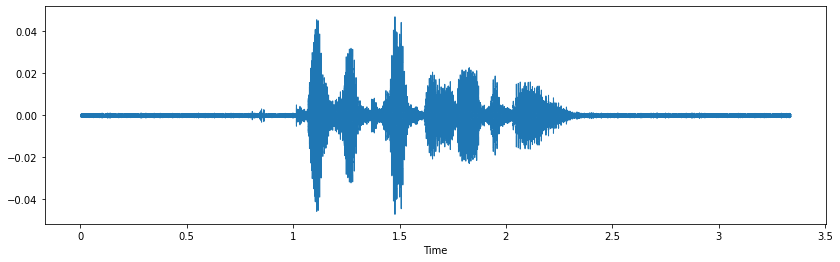

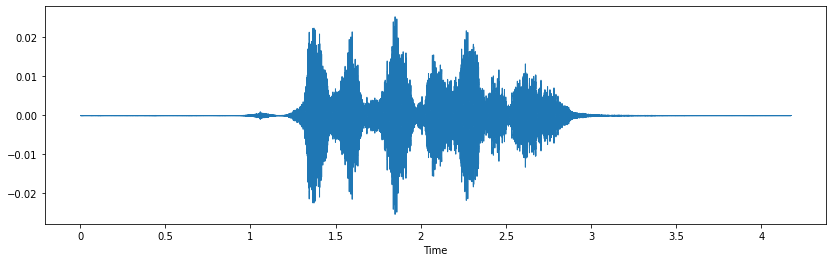

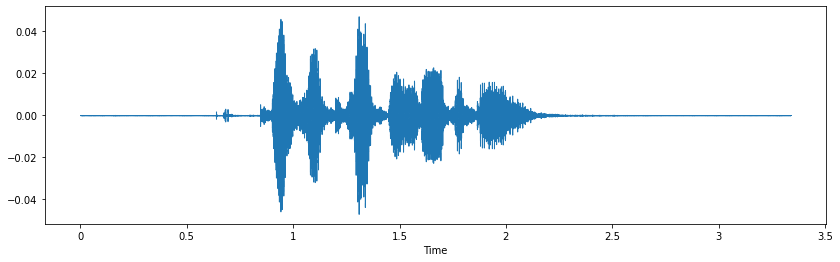

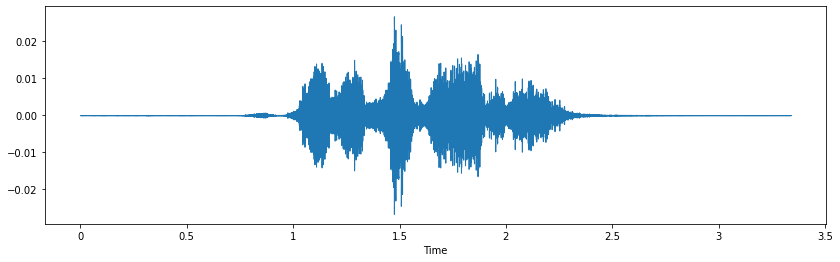

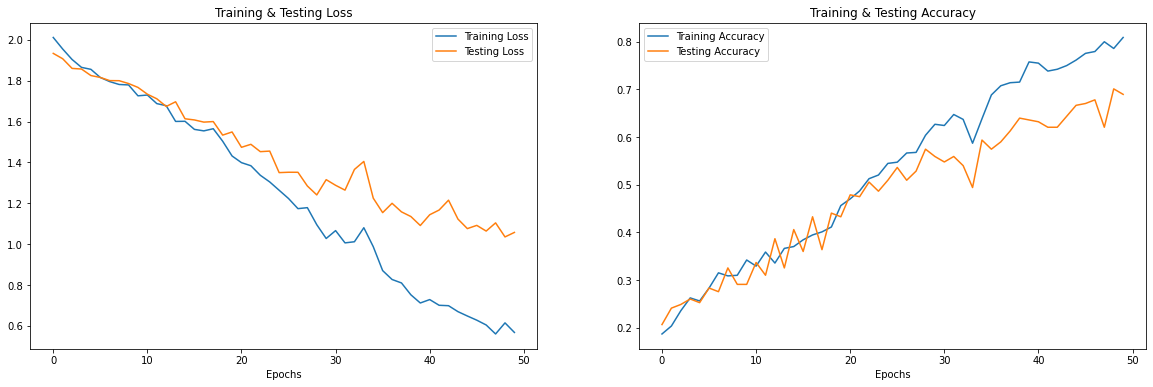

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [30]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

Predicted Labels Actual Labels
0              sad         happy
1             calm          calm
2         surprise      surprise
3            angry         angry
4             fear          fear
5            happy           sad
6             fear          fear
7             calm          calm
8            happy       disgust
9          disgust       disgust

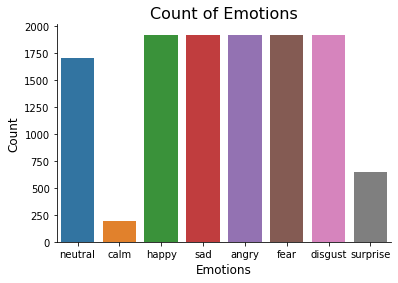

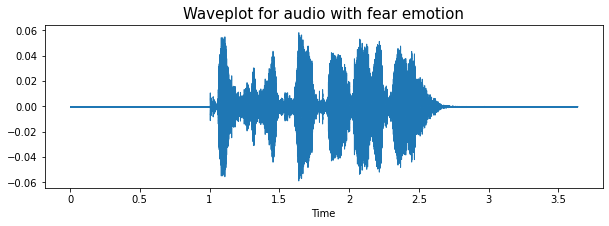

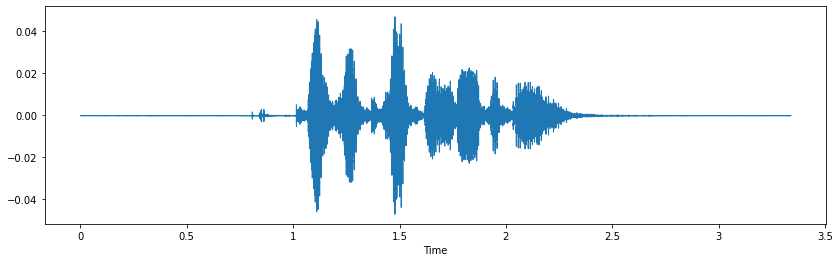

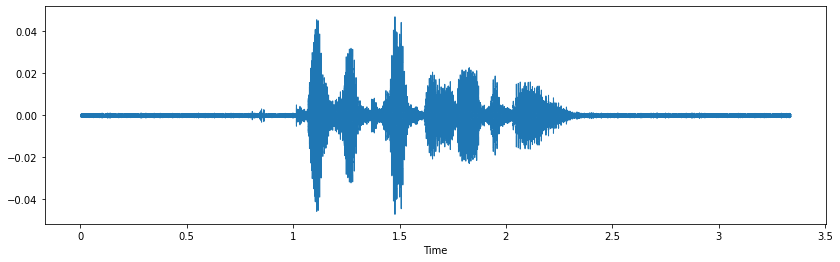

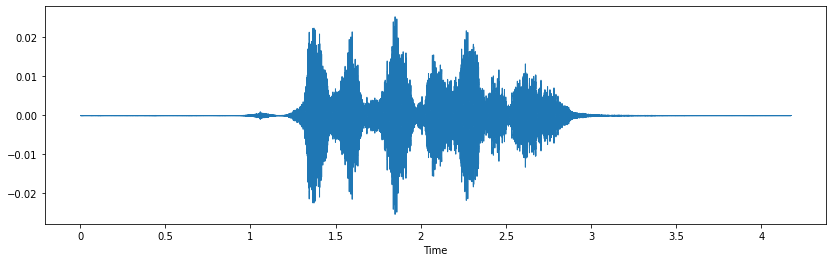

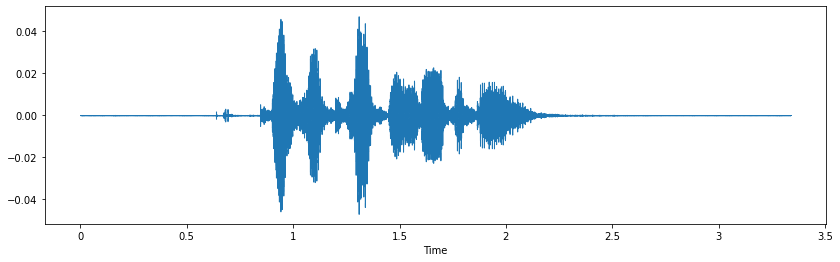

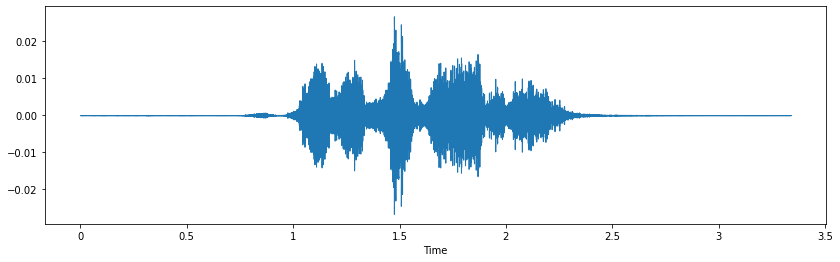

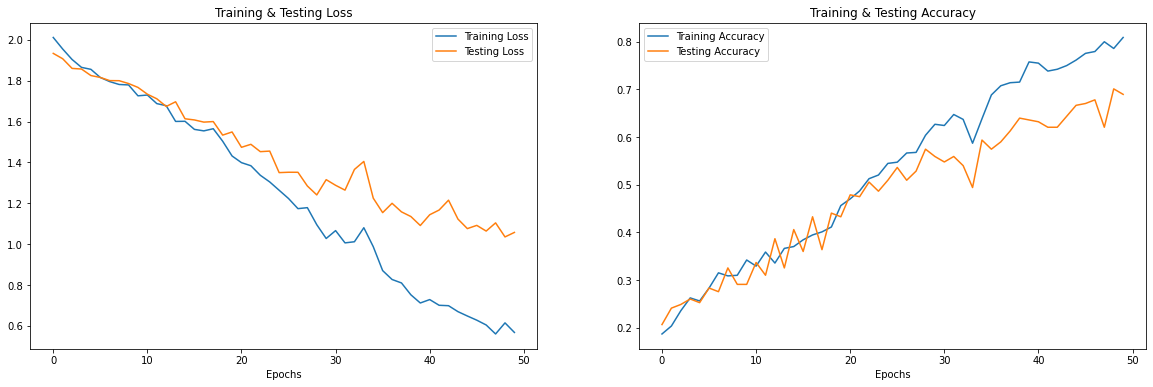

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [31]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

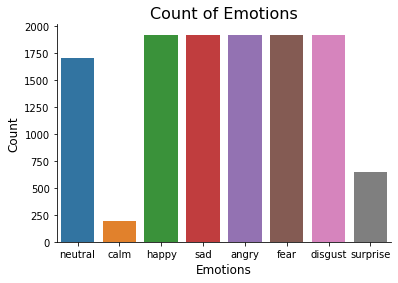

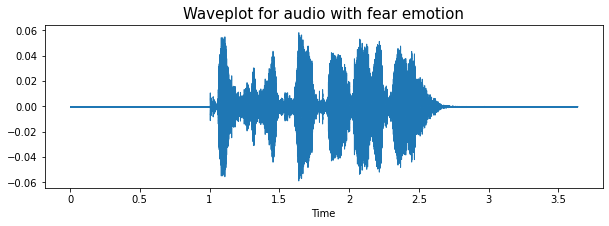

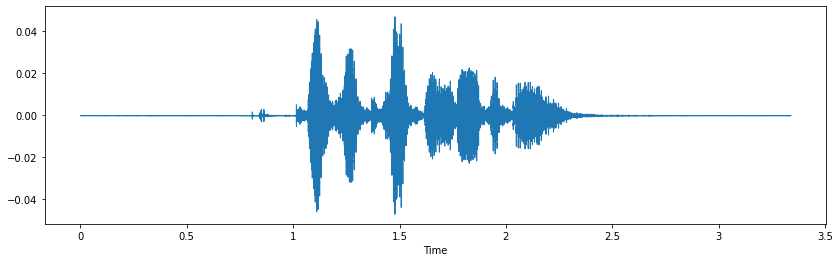

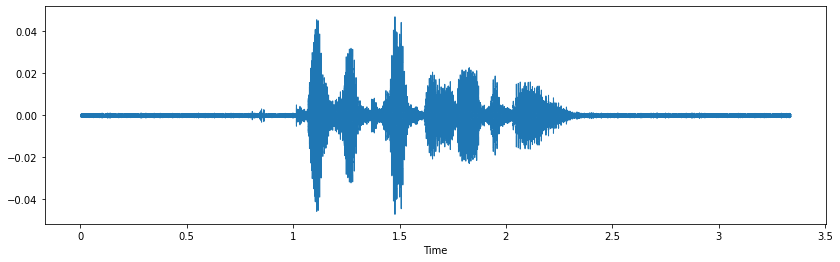

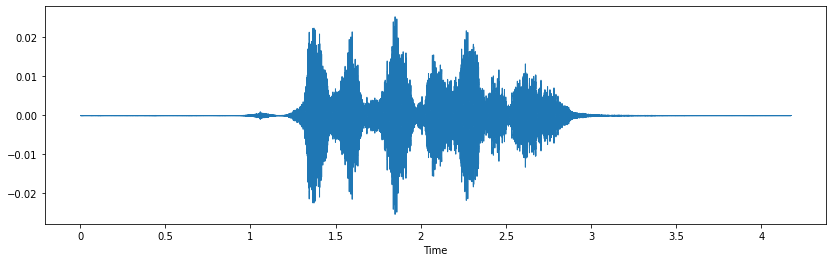

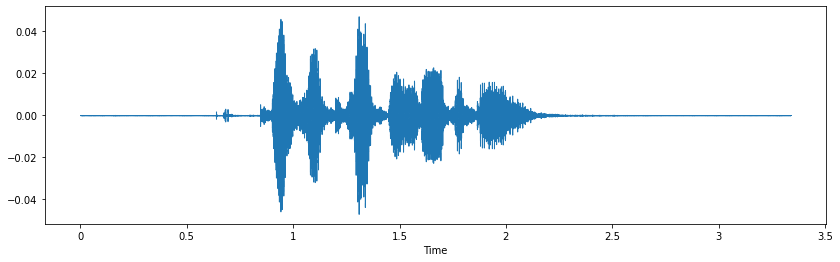

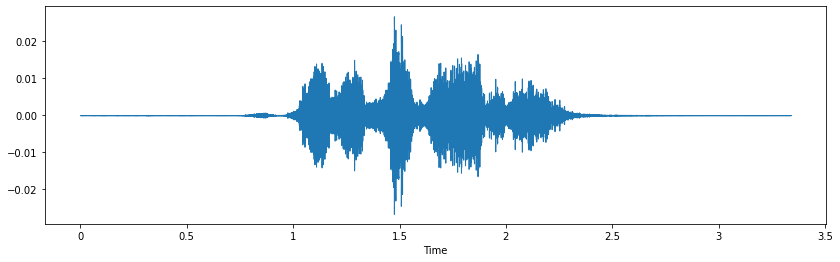

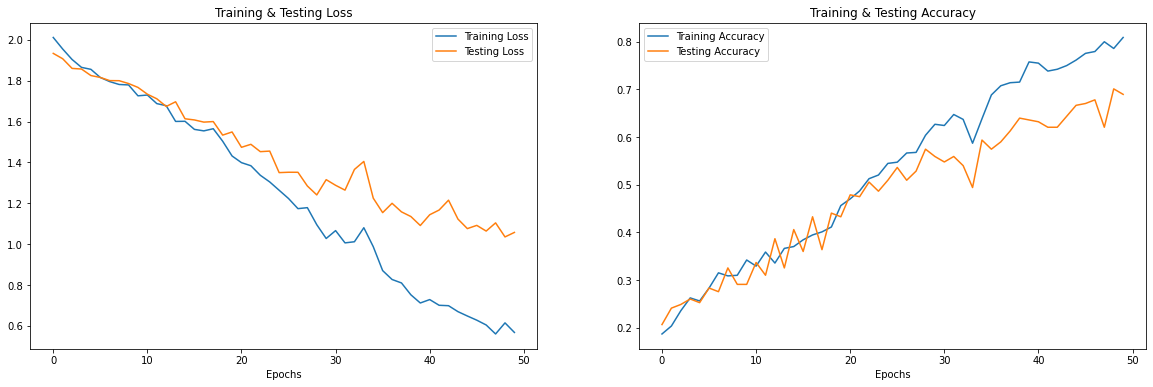

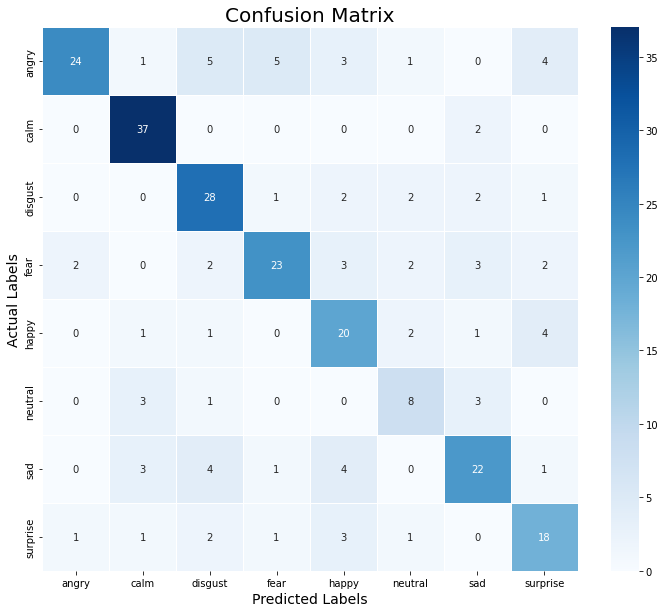

AttributeError: module 'matplotlib' has no attribute 'pyplot'

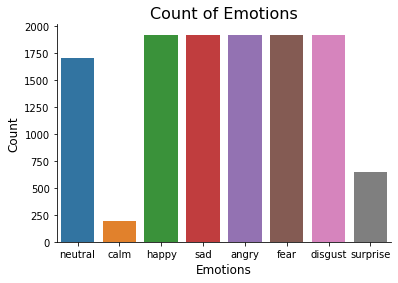

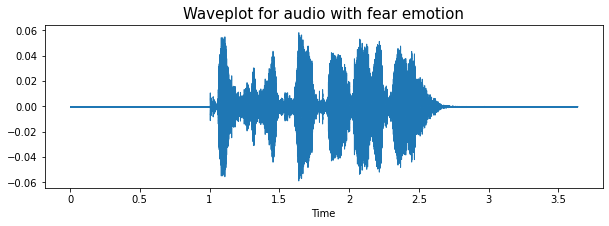

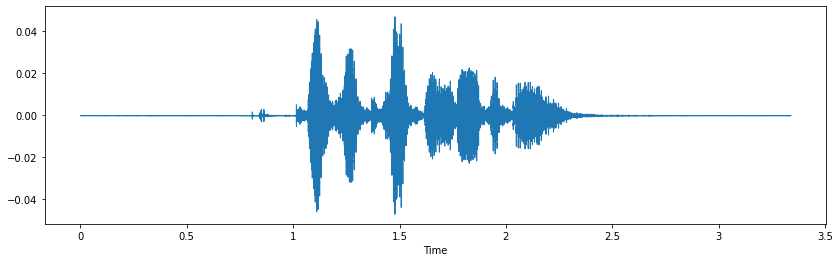

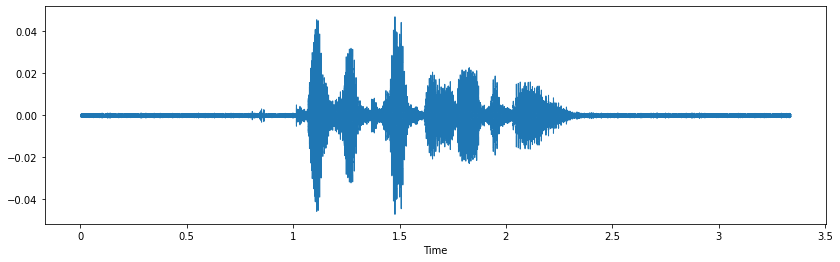

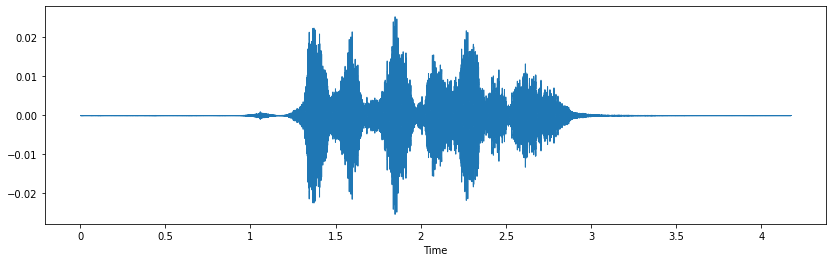

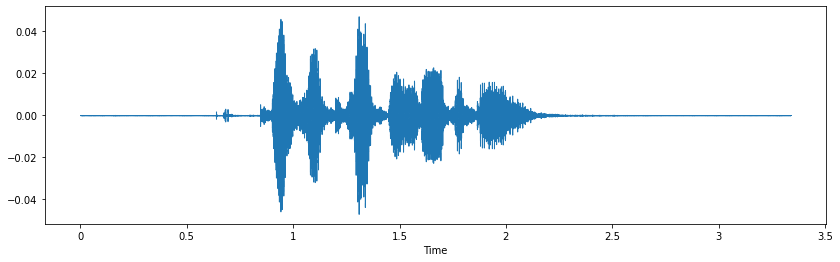

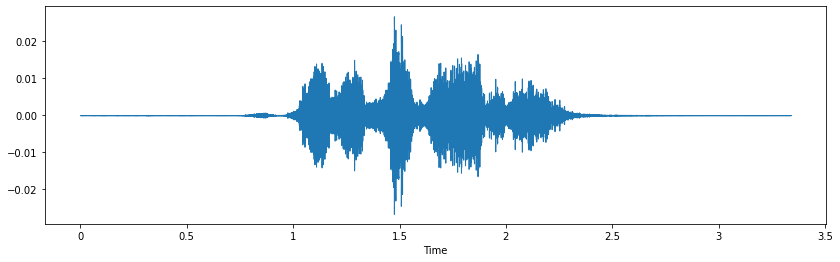

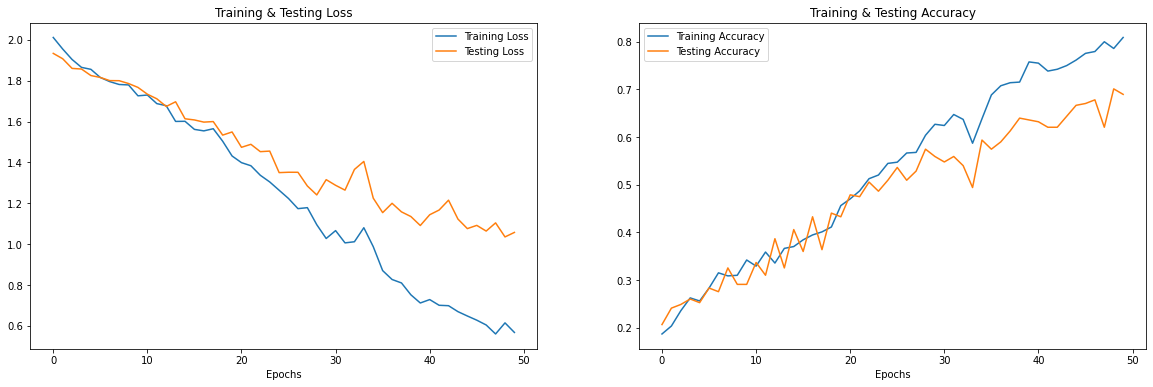

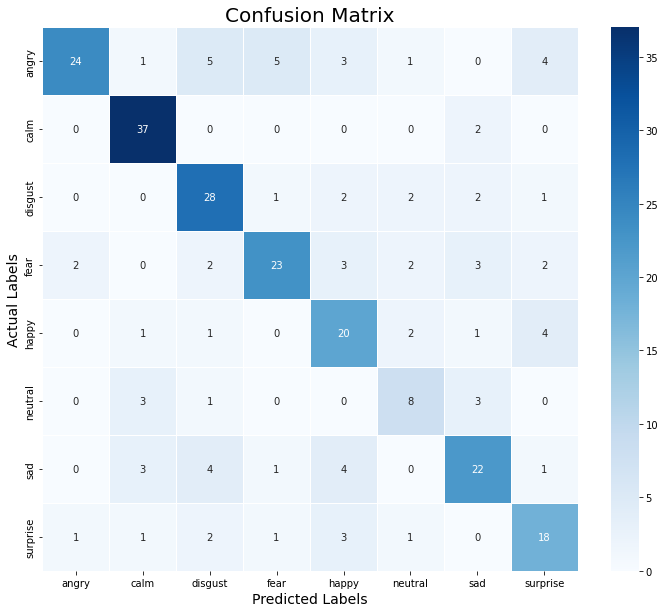

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

              precision    recall  f1-score   support

       angry       0.89      0.56      0.69        43
        calm       0.80      0.95      0.87        39
     disgust       0.65      0.78      0.71        36
        fear       0.74      0.62      0.68        37
       happy       0.57      0.69      0.62        29
     neutral       0.50      0.53      0.52        15
         sad       0.67      0.63      0.65        35
    surprise       0.60      0.67      0.63        27

    accuracy                           0.69       261
   macro avg       0.68      0.68      0.67       261
weighted avg       0.71      0.69      0.69       261



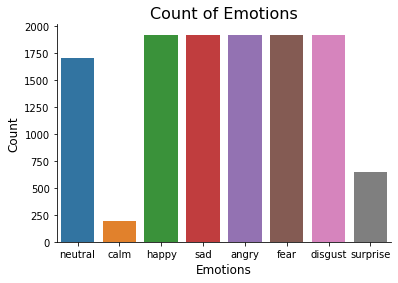

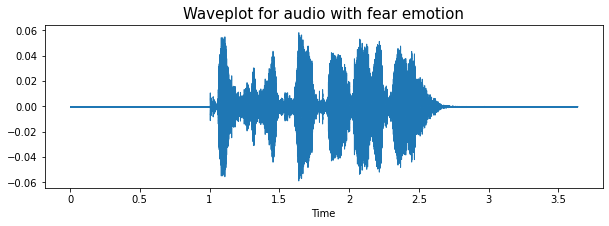

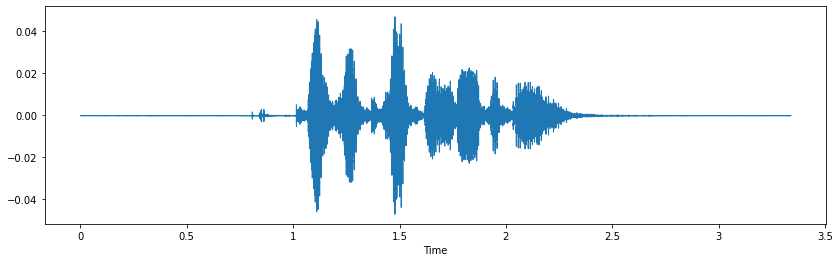

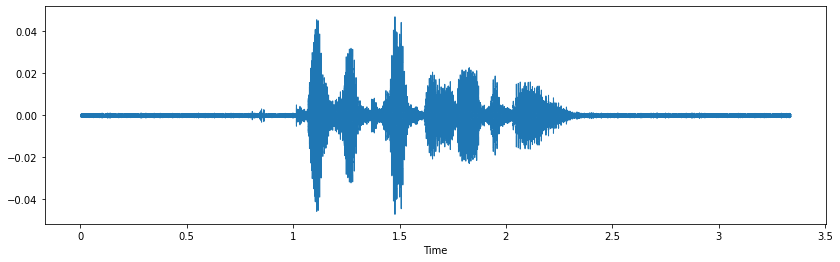

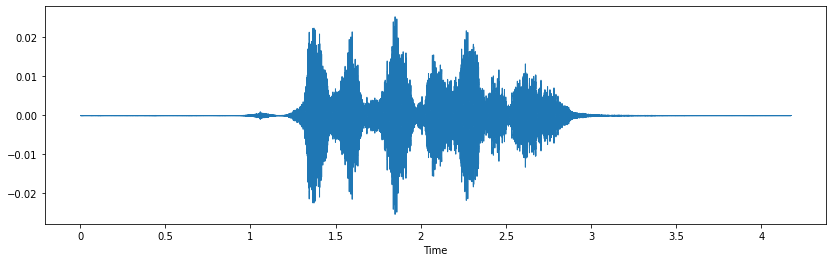

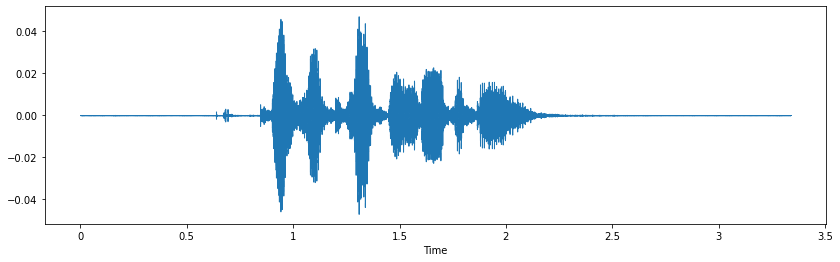

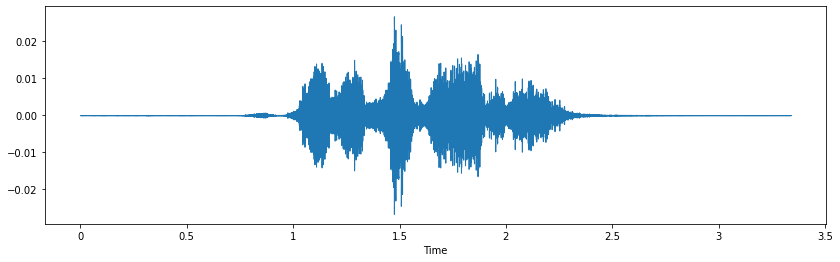

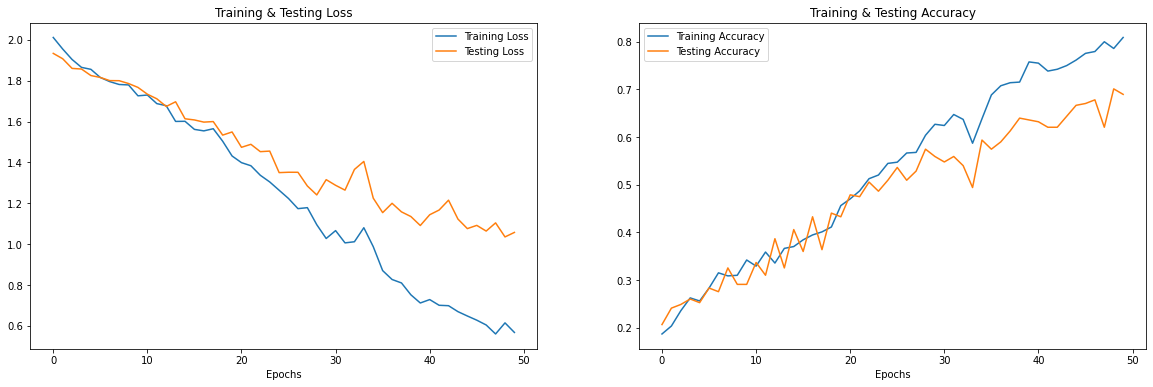

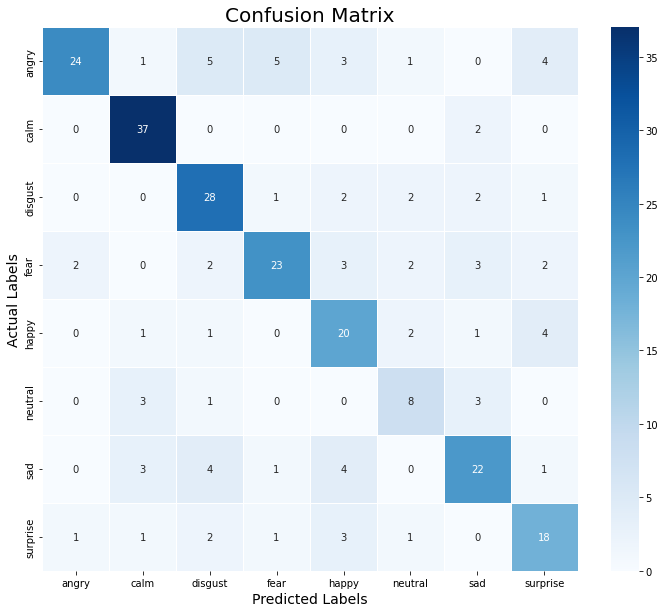

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [33]:
print(classification_report(y_test, y_pred))